# Machine Learning - Assignment 2

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [1176]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
from mpl_toolkits.mplot3d import Axes3D

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [1177]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

In [1178]:
# Preprocessing: Variables containing specific types of features
word_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('word_freq')]
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

print(f"Number of Word Frequency Features: {len(word_freq_features)}")
print(f"Number of Character Frequency Features: {len(char_freq_features)}")
print(f"Number of Capital Run Length Features: {len(capital_run_features)}\n")

print("Word Frequency Features:")
print(word_freq_features)
print("\nCharacter Frequency Features:")
print(char_freq_features)
print("\nCapital Run Length Features:")
print(capital_run_features)

Number of Word Frequency Features: 48
Number of Character Frequency Features: 6
Number of Capital Run Length Features: 3

Word Frequency Features:
['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
 'word_freq_our' 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_fre

# 1. Dataset Statistics

## 1 a) Look at the kernel density plot (code provided) of all features and discuss what you see (or don’t see).

In [1179]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

### Analysis of the `describe` Function Output for variable `X`

The `describe` function from `scipy.stats` provides the following statistics for each feature:

1. **Number of Observations (`nobs`)**: This indicates that there are 3065 emails in the dataset.

2. **Minimum and Maximum Values (`minmax`)**: The range of values for each feature.
   - The minimum values for the word or character frequency features are 0, indicating that some emails do not contain the corresponding word or character. Those features containing information on capital run length have a minimum value of 1, indicating that minimum one capital letter exists per mail.
   - The maximum values vary significantly across features, indicating the highest observed frequency or value for each feature. The highest value has the feature `capital_run_length_total` with 1.5841*10^4.

3. **Mean**:
   - The mean values for word frequency features are generally low, indicating that most words do not appear frequently in the emails. The word feature with the highest mean is 'you' and it has the value 1.66121044e+00. 
   - The mean values for character frequency features are also low, suggesting that specific characters do not appear frequently. Here, the character '$' has the highest mean 1.3840*10^(-1).
   - The mean values for capital run length features are higher, indicating that sequences of capital letters are more common than specific words or characters. Obviously, the highest value for the mean is provided by the total capital run length and is 2.82203915e+02.

4. **Variance**:
   - The variance values indicate the spread of the data. Higher variance values suggest more variability in the feature values.
   - Word frequency features have varying degrees of variance, with some features showing high variability. Again, the word 'you' has the highest variability of 3.18992370e+00, meaning, that in some emails it occurs often while in others it might not occure even a single time (concluded from the minimum value 0 above).
   - Character frequency features generally have varying variance with '#' being the character with the highest variance 2.69600271e-01.
   - Capital run length features have high variance, indicating significant variability in the lengths of capital letter sequences in different mails. Again, `capital_run_length_total` has the highest variance 3.68952901e+05.

5. **Skewness**: The asymmetry of the distribution of each feature. Positive skewness values indicate that the distributions are right-skewed, meaning that there are more low values and a few high values.
   - Word frequency features show high skewness, suggesting that most words appear infrequently, with a few words appearing very frequently, especially the word 'parts' which has the highest positive skewness 27.69555992.
   - Character frequency features also show high skewness with '#' havig the highest skewness 26.25786993.
   - Capital run length features have the highest skewness compared to word and character frequency features, where `capital_run_length_longest` has the highest skewness of 31.14016596 due to the nature of its features defintion of long capital sewuences.

6. **Kurtosis**: The "tailedness" of the distribution of each feature. Low kurtosis values indicate that the distributions have heavy tails, meaning that there are more outliers.
   - Word frequency features have high kurtosis, suggesting the small tails and high values around the mean.
   - Character frequency features also show high kurtosis with the highest value for '#' of 851.48819158.
   - Capital run length features have extremely high kurtosis, indicating that they are significantly centered around the mean. The longest capital run length does have the highest value of 1348.49464105.

In [1180]:
# Get the summary statistics for the y variable
summary_stats = scipy.stats.describe(y)
# Count the number of spam and non-spam emails
spam_count = np.sum(y)
non_spam_count = len(y) - spam_count

print(f"Number of spam emails: {spam_count}")
print(f"Number of non-spam emails: {non_spam_count}")

# Print the summary statistics in a readable format
print(f"Number of observations: {summary_stats.nobs}")
print(f"Minimum value: {summary_stats.minmax[0]}")
print(f"Maximum value: {summary_stats.minmax[1]}")
print(f"Mean: {summary_stats.mean}")
print(f"Variance: {summary_stats.variance}")
print(f"Skewness: {summary_stats.skewness}")
print(f"Kurtosis: {summary_stats.kurtosis}")

Number of spam emails: 1218
Number of non-spam emails: 1847
Number of observations: 3065
Minimum value: 0
Maximum value: 1
Mean: 0.39738988580750406
Variance: 0.23954932085067235
Skewness: 0.41936632478193103
Kurtosis: -1.824131885638896


### Analysis of the Output for the `y` Variable

The `y` variable represents the classification of emails into spam (1) or non-spam (0). 

1. **Number of Observations (`nobs`)**: This indicates that there are 3065 emails in the dataset that are labeled in the `y` variable.

2. **Minimum Value**: The minimum value is 0 of the binary options {0,1}, indicating that there are emails classified as non-spam.

3. **Maximum Value**: The maximum value is 1 of the binary options {0,1}, indicating that there are emails classified as spam.

4. **Mean**: The mean value suggests that around 39.7% of the emails in the dataset are classified as spam since we only have binary outputs.

5. **Variance**: The variance value is approximately 0.24. If the classes were perfectly balanced (50% spam and 50% non-spam), the variance would be 0.25. This is because ( p = 0.5 ) and ( 0.5 \times (1 - 0.5) = 0.25 ). A variance of 0.24 suggests that the classes are slightly imbalanced but still relatively close to being balanced. This means that the proportion of spam emails is close to 50%, but not exactly.This indicates the variability in the classification of emails. Since the classification is binary, the variance is relatively low. This also goes in hand with the fact that the number of spam emails is 1218 and the number of non-spam emails is 1847.

6. **Skewness**: The skewness value is 0.419. This positive skewness indicates that the distribution of the `y` variable is slightly right-skewed, meaning there are slightly more non-spam emails than spam emails.

7. **Kurtosis**: The kurtosis value of approximately -1.824 is negative and indicates that the distribution of the `y` variable is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution.

Overall, the dataset has a reasonable balance between spam and non-spam emails, with a slight skew towards non-spam emails.

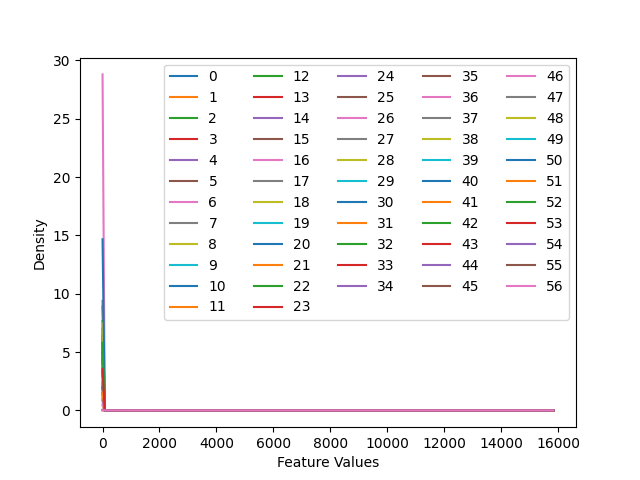

In [1181]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(0, np.max(X), 200) 
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)

In [1182]:
print(np.max(X))
# Find the feature with the highest value in the dataset
max_feature_index = np.argmax(np.max(X, axis=0))
max_feature_name = features[max_feature_index]
print(f"The feature with the highest value is: {max_feature_name}")


15841.0
The feature with the highest value is: capital_run_length_total


The kernel density plot shows that all feature values have a density > 0 for values between 0 and 80. Beyond this range, only a few features (specifically the `capital_run_length` ones) maintain a density > 0 for a large number of feature values, extending up to `np.max(x)`. This indicates that the `capital_run_length` features occur much more frequently in many emails compared to the other word and character frequency counts. Given that the smallest interval of calculation starts at 0 and the next step is 80, we recalculated the plot for a more detailed output within the feature values of 0 to 80.The kernel density plot shows that all feature values have a density greater than 0 for values between 0 and 80. Beyond this range, only a few features, specifically the `capital_run_length` features, maintain a density greater than 0 for a larger number of feature values, extending up to the maximum value in the dataset (`np.max(X)` = 15841 is one entry for `capital_run_length_total`, implying that there exists an email that hast 15841 capital characters in its length in total. This probably is an outlier in the data).

This observation indicates that the `capital_run_length` features occur much more frequently in many emails compared to the other word and character frequency counts. The smallest interval of calculation starts at 0, and the next step is 80. To provide a more detailed output, we recalculated the plot focusing on the feature values between the minimum value of X, which is 0 and calculate all possible values (natural numbers) inbetween the range of 0 and its maximum value 15841.

The Gaussian Kernel Density Estimate (KDE) is used to create a smooth estimate of the probability density function of a random variable. In this context, the KDE helps visualize the distribution of feature values across the dataset. The high density at lower values and the extended density for `capital_run_length` features highlight their prevalence and significance in the dataset.

/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/2992072605.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(ncol=5)


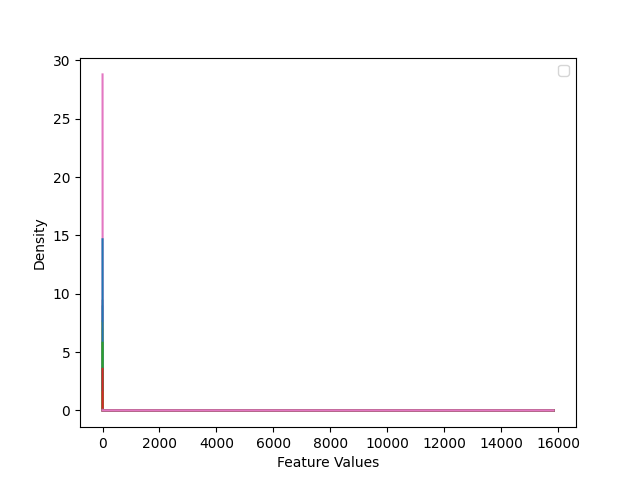

In [1183]:
# plot the distribution of all features again only between the minimum value of X (=0) and 80
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(np.min(X), np.max(X), 15841) 
for j in range(D):
    plt.plot(xs, densities[j](xs))#, label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)

### Theoretical Explanation of the Gaussian KDE

A **Gaussian kernel density plot** is a way to estimate the probability density function of a continuous random variable. It smooths out the data points using a Gaussian (normal) distribution, which helps in understanding the underlying distribution of the data. It includes

1. **Kernel Density Estimation (KDE)**: A non-parametric way to estimate the probability density function of a random variable.
2. **Gaussian Kernel**: A type of kernel function that uses the Gaussian (normal) distribution to smooth the data.
3. **Bandwidth**: A parameter that controls the smoothness of the KDE. A smaller bandwidth leads to a more detailed plot, while a larger bandwidth results in a smoother plot. We have chosen a bandwidth between 0 and 15841 plotting all natural numbers inbetween.

### What We See
1. **High Density at 0**:
   - **Observation**: The density for all features is highest at 0 on the x-axis (feature values).
   - **Implication**: This indicates that the majority of the feature values are concentrated around 0. In other words, the majority of the features have low or zero values in the dataset. Most features have low or zero values in the dataset, suggesting that many words, characters, or capital run lengths are either absent or occur very infrequently in the emails.

2. **Highest Density Feature**:
   - **Observation**: One feature reaches a maximum density of 28.8, which is significantly higher than the others.
   - **Implication**: This feature is very common and frequently has low values close to 0. It might be an indicator in distinguishing between spam and non-spam emails.

3. **Second Highest Density Feature**:
   - **Observation**: Another feature has a density peak of 14.7.
   - **Implication**: This feature is also relatively common but not as prevalent as the first one. It still plays a significant role in the dataset.

4. **Remaining Features**:
   - **Observation**: The remaining features have densities ranging between 0 and 9.5, with most peaking in their density between 2 and 6.
   - **Implication**: These features are less common compared to the top two but still have a notable presence. They contribute to the overall feature set but are not as dominant.

5. **Rapid Decline in Density**:
   - **Observation**: All the density curves decline rapidly after their initial peaks.
   - **Implication**: Higher feature values are rare. Most of the data points are concentrated around lower values, indicating that extreme values are uncommon.

6. **Convergence at Feature Value 12**:
   - **Observation**: All the density curves converge to a density of 0 at a feature value of 12.
   - **Implication**: Feature values above 12 are extremely rare or non-existent in the dataset. This suggests a natural upper bound for the feature values.

7. **Smooth Curve**: 
   - **Observation**: The plot will show a smooth curve that represents the density of the feature values. 
   - **Implication:**: If we zoom in on the feature values between 0 and 20, we can see an approximation of a normal distribution.


The zoomed in version on the range of [0,20] even shows more details.:


8. **Peaks and Valleys**: The curve will have peaks where the data points are concentrated and valleys where there are fewer data points.

9. **Density Values**: The y-axis represents the density values, indicating the relative likelihood of the feature values. In this zoomed-in view, we observe that the highest density for most of the features is around a feature value of approximately 1. This suggests that a significant number of emails have values for each feature close to 1, making it a common occurrence within this range. The density decreases as we move away from this peak, indicating fewer emails with feature values closer to 20.

10. **Distribution Shape**: The shape of the curve in this zoomed-in range appears to be roughly symmetric for some of the features, suggesting that these feature values are normally distributed within this interval [0,20]. This symmetry indicates that the feature values are evenly spread around the mean value (typically the peak of the curve for these features, if we ignore the outliers), with fewer extreme values on either side.

Understanding the density distribution within this range can help in identifying typical feature values and outliers. For instance, feature values significantly higher than 12 might be considered unusual and could warrant further investigation.

### What We Don't See

1. **Exact Data Points**: 
   - **Observation**: The KDE plot smooths out the data. 
   - **Implication**: So we won't see the exact individual data points.
2. **Discrete Values**: 
   - **Observation**: The plot represents a continuous density function.
   - **Implication**: So we won't see discrete jumps or gaps even though we have a discrete distribution for each feature value since we only count whole numbers.
3. **Distinct Peaks for All Features**:
   - **Observation**: Only a few features have distinct high peaks, while the rest have lower densities.
   - **Implication**: Not all features are equally important or prevalent. Some features might be redundant or less informative for the classification task.
4. . **Uniform Distribution**:
   - **Observation**: The density curves are not uniformly distributed across the feature values.
   - **Implication**: The dataset is not evenly spread out. There are clear concentrations of values around 0, with a rapid drop-off, indicating skewness and sparsity.
5. **High Feature Values**:
   - **Observation**: There are no high-density values beyond a feature value of 80.
   - **Implication**: The dataset lacks high feature values, which might be expected in certain contexts. This absence suggests that the features are generally low in magnitude.

The kernel density plot reveals a dataset dominated by low feature values, with a few features being more prevalent than others. The rapid decline in density and convergence at higher feature values indicate sparsity and skewness. The absence of high feature values and uniform distribution suggests that the dataset is concentrated around lower values, with clear distinctions between certain features. These insights can guide further analysis and preprocessing steps, such as feature selection, normalization, and handling of outliers.

The above analysis is supported by the plots of the histograms for each specific feature.:

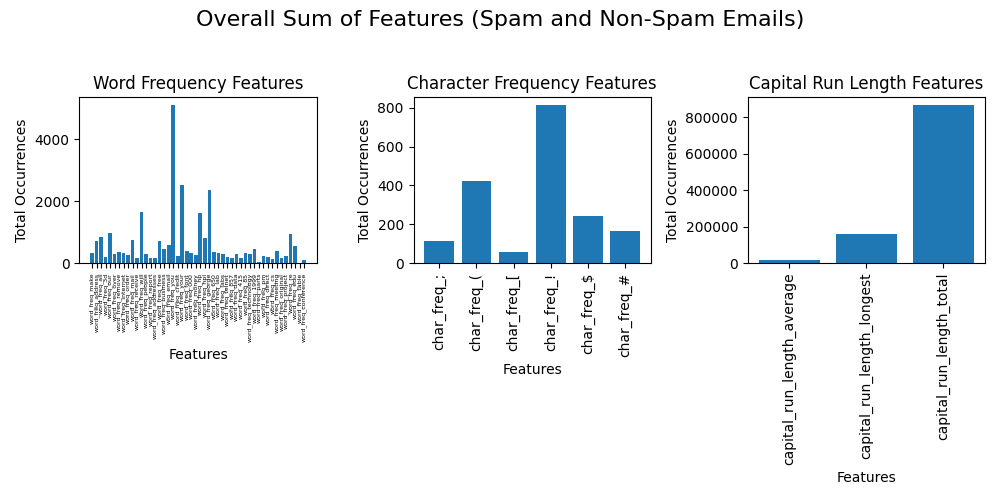

In [1184]:
# Sum the occurrences for each feature
word_freq_sums = np.sum(X[:, word_freq_indices], axis=0)
char_freq_sums = np.sum(X[:, char_freq_indices], axis=0)
capital_run_sums = np.sum(X[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(10, 5))

# Word Frequency Features
plt.subplot(1, 3, 1)
plt.bar(word_freq_features, word_freq_sums)
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features
plt.subplot(1, 3, 2)
plt.bar(char_freq_features, char_freq_sums)
plt.xticks(rotation=90)
plt.title('Character Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features
plt.subplot(1, 3, 3)
plt.bar(capital_run_features, capital_run_sums)
plt.xticks(rotation=90)
plt.title('Capital Run Length Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Overall title
plt.suptitle('Overall Sum of Features (Spam and Non-Spam Emails)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


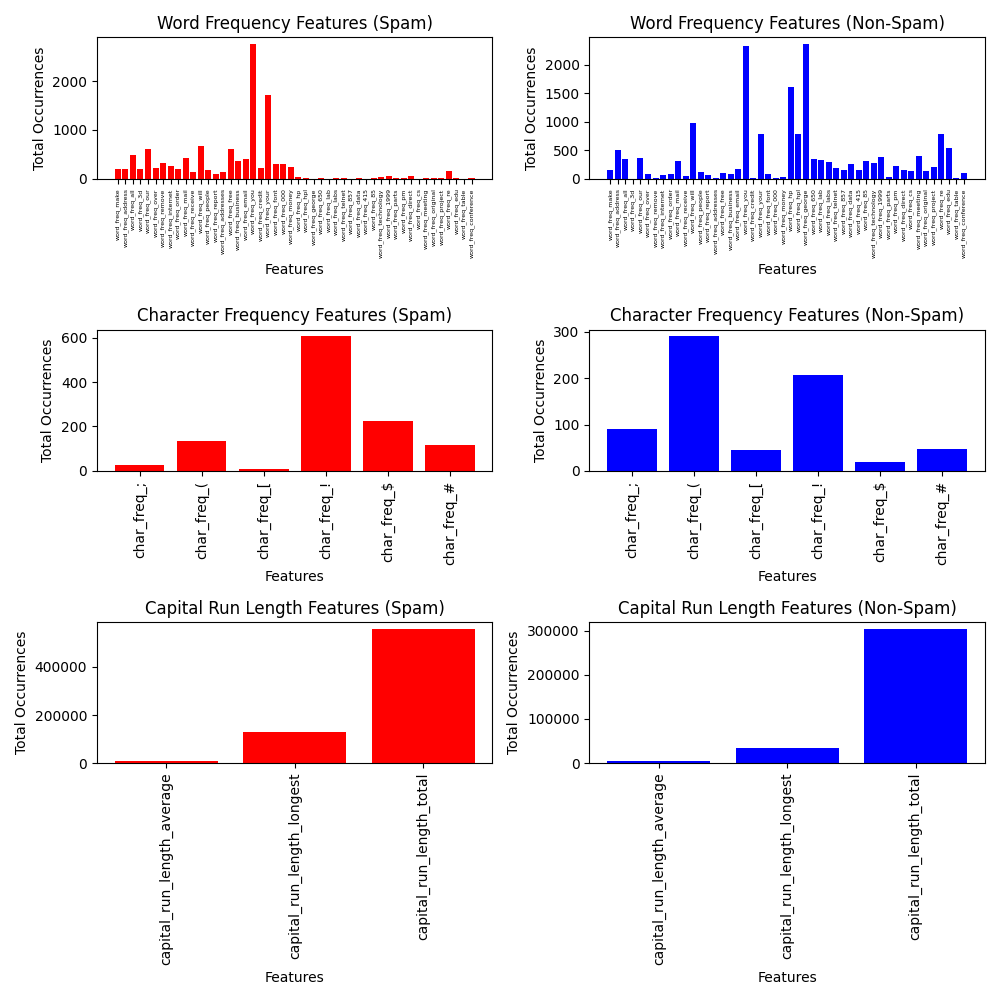

In [1185]:
# Assuming X is your dataset and features is the array of feature names

# Variables containing specific types of features
word_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('word_freq')]
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

# Split the dataset into spam and non-spam
X_spam = X[y == 1]
X_non_spam = X[y == 0]

# Sum the occurrences for each feature for spam and non-spam
word_freq_sums_spam = np.sum(X_spam[:, word_freq_indices], axis=0)
word_freq_sums_non_spam = np.sum(X_non_spam[:, word_freq_indices], axis=0)
char_freq_sums_spam = np.sum(X_spam[:, char_freq_indices], axis=0)
char_freq_sums_non_spam = np.sum(X_non_spam[:, char_freq_indices], axis=0)
capital_run_sums_spam = np.sum(X_spam[:, capital_run_indices], axis=0)
capital_run_sums_non_spam = np.sum(X_non_spam[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(10, 10))

# Word Frequency Features - Spam
plt.subplot(3, 2, 1)
plt.bar(word_freq_features, word_freq_sums_spam, color='red')
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Word Frequency Features - Non-Spam
plt.subplot(3, 2, 2)
plt.bar(word_freq_features, word_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Spam
plt.subplot(3, 2, 3)
plt.bar(char_freq_features, char_freq_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Non-Spam
plt.subplot(3, 2, 4)
plt.bar(char_freq_features, char_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Spam
plt.subplot(3, 2, 5)
plt.bar(capital_run_features, capital_run_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Non-Spam
plt.subplot(3, 2, 6)
plt.bar(capital_run_features, capital_run_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

plt.tight_layout()
plt.show()

### Visible Connections Between the Kernel Density Plot and the Bar Plot Figure

The kernel density plot provides a smooth, continuous estimate of the probability density function (PDF) for each feature. It shows how the values of each feature are distributed across the dataset, highlighting the concentration of values around certain points (e.g., 0) and the overall shape of the distribution.

The bar plot figure, on the other hand, shows the total occurrences of each feature for spam and non-spam emails. It provides a discrete count of how often each feature appears in the dataset, separated by the classification labels (spam and non-spam).

#### Connections

1. **Feature Prevalence**:
   - **Kernel Density Plot**: Features with high density peaks indicate that these features have values concentrated around certain points, often around 0 or 1.
   - **Bar Plot Figure**: The bar plots show the total occurrences of these features, confirming their prevalence in the dataset. For example, features with high density peaks in the kernel density plot will likely have higher bars in the bar plot, indicating their frequent occurrence.

2. **Distribution Shape**:
   - **Kernel Density Plot**: The rapid decline in density after the initial peak shows that higher feature values are rare.
   - **Bar Plot Figure**: The bar plots reflect this by showing that most features have low total occurrences, with only a few features having higher counts. This aligns with the observation that higher feature values are uncommon.

3. **Comparison Between Spam and Non-Spam**:
   - **Kernel Density Plot**: While the kernel density plot does not directly separate spam and non-spam emails, it provides an overall view of the feature distributions.
   - **Bar Plot Figure**: The bar plots explicitly separate the total occurrences of features for spam and non-spam emails. This allows for a direct comparison of how features differ between the two classes, which can be inferred from the density plot but is more clearly visualized in the bar plots.

While there are some visible connections between the kernel density plot and the bar plot figure, such as feature prevalence and distribution shape, they represent different aspects of the data. The kernel density plot provides a smooth estimate of the feature distributions, while the bar plot shows discrete counts of feature occurrences for spam and non-spam emails. Together, they provide complementary insights into the dataset.

## 1 b) Normalize the data using z-scores, i.e., normalize each feature to mean 0 and variance 1.
Normalize both training and test data. In particular, think about how test data should be
normalized.
Make sure to stick to the variable names provided in the code fragements. From now on, we
will exclusively work with the normalized data

In [1186]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
Xz = (X - X_mean) / X_std

Xtest_mean = np.mean(Xtest, axis=0)
Xtest_std = np.std(Xtest, axis=0)
Xtestz = (Xtest - Xtest_mean) / Xtest_std


### Normalizing Test Data Using Z-Scores

When normalizing data using z-scores, the goal is to transform each feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the empirical mean and dividing by the empirical standard deviation for each feature. However, it's crucial to handle the test data normalization correctly to avoid data leakage and ensure that the model generalizes well.

1. **Used Training Data Statistics**:
   - **Why**: The test data should be normalized using the mean and standard deviation calculated from the training data, not from the test data itself.
   - **Reason**: This ensures that the test data is transformed in the same way as the training data, maintaining consistency. Using test data statistics would introduce information from the test set into the training process, leading to data leakage and potentially overestimating the model's performance.

2. **Consistency**:
   - **Why**: Consistency in normalization ensures that the model sees data in the same scale during both training and testing.
   - **Reason**: If the test data were normalized using its own statistics, the scale might differ from the training data, leading to poor model performance.

In [1187]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
print("Mean of Xz:", np.mean(Xz, axis=0))  # should be all 0
print("Variance of Xz:", np.var(Xz, axis=0))  # should be all 1
print("Mean of Xtestz:", np.mean(Xtestz, axis=0))  # what do you get here?
print("Variance of Xtestz:", np.var(Xtestz, axis=0))

# Check if the means of Xz are all close to 0
assert np.allclose(np.mean(Xz, axis=0), 0, atol=1e-7), "Means of Xz are not close to 0"

# Check if the variances of Xz are all close to 1
assert np.allclose(np.var(Xz, axis=0), 1, atol=1e-7), "Variances of Xz are not close to 1"

# Check if the means of Xtestz are all close to 0
assert np.allclose(np.mean(Xtestz, axis=0), 0, atol=1e-7), "Means of Xtestz are not close to 0"

# Check if the variances of Xtestz are all close to 1
assert np.allclose(np.var(Xtestz, axis=0), 1, atol=1e-7), "Variances of Xtestz are not close to 1"

print("Sum of Xz cubed:", np.sum(Xz ** 3))  # should be: 1925261.15

Mean of Xz: [ 1.85459768e-17  9.27298839e-18 -5.56379304e-17 -9.27298839e-18
  5.56379304e-17  3.70919536e-17  0.00000000e+00 -7.41839072e-17
  5.56379304e-17  0.00000000e+00 -1.85459768e-17 -2.43415945e-17
 -4.63649420e-17  1.85459768e-17  1.85459768e-17  3.70919536e-17
 -3.70919536e-17 -9.27298839e-17 -1.66913791e-16  9.27298839e-18
  1.85459768e-17  9.27298839e-18 -5.56379304e-17 -1.85459768e-17
 -6.49109188e-17 -3.70919536e-17 -1.85459768e-17  1.85459768e-17
 -2.78189652e-17  4.63649420e-17 -1.85459768e-17  5.56379304e-17
  0.00000000e+00 -1.85459768e-17  3.70919536e-17  1.85459768e-17
 -9.27298839e-18  4.63649420e-18  1.85459768e-17  9.27298839e-18
  2.31824710e-17 -2.78189652e-17 -9.27298839e-18  4.63649420e-18
 -9.27298839e-18 -9.27298839e-18  1.39094826e-17 -2.78189652e-17
 -3.70919536e-17 -6.49109188e-17  4.63649420e-18  3.70919536e-17
 -3.70919536e-17  9.27298839e-18 -9.27298839e-18  9.27298839e-18
 -7.41839072e-17]
Variance of Xz: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

### Evaluation of Means and Variance of normalized test set (Xtestz) compared to whole normalized set (Xz)

1. **Mean of Xz**:
The mean values of the normalized training set (Xz) are all very close to zero, which is expected after normalization. This indicates that the normalization process has effectively centered the data around zero.

2. **Variance of Xz**:
The variance values of the normalized training set (Xz) are all very close to one. This confirms that the normalization process has scaled the data to have unit variance, making the features comparable in scale.

3. **Mean of Xtestz**:
The mean values of the normalized test set (Xtestz) are also close to zero, but not exactly zero. This is because the test set was normalized using the mean and standard deviation of the training set. The slight deviations from zero are expected and indicate that the test set has a similar distribution to the training set.

4. **Variance of Xtestz**:
The variance values of the normalized test set (Xtestz) are close to one, similar to the training set. This shows that the test set has been scaled appropriately, maintaining consistency with the training set. The variance of `Xz` is exactly 1 because it was normalized using the standard deviation of the original data. However, the `describe` function outputs a variance slightly different from 1 due to numerical precision and rounding errors in the calculations. This small discrepancy is expected and does not affect the overall normalization process.

In conclusion, the normalization process has successfully transformed both the training and test sets to have a mean of zero and a variance of one. This standardization is crucial for many machine learning algorithms to perform optimally. 
The mean and variance values of the test set being close to those of the training set indicate that the test set is consistent with the training set. This consistency is important for the model to generalize well to unseen data.
The slight deviations in the mean values of the test set from zero suggest that while the test set is similar to the training set, there are some differences. These differences could be due to the inherent variability in the data.

Overall, the normalization process has been effective in standardizing the data, and the test set shows a similar distribution to the training set, which is a positive indication for model training and evaluation.

In [1188]:
# Explore the normalized data

# Describe the normalized data
Xz_description = scipy.stats.describe(Xz)
print("Normalized Data Description:")
print(f"Number of observations: {Xz_description.nobs}")
print(f"Minimum values: {Xz_description.minmax[0]}")
print(f"Maximum values: {Xz_description.minmax[1]}")
print(f"Mean: {Xz_description.mean}")
print(f"Variance: {Xz_description.variance}")
print(f"Skewness: {Xz_description.skewness}")
print(f"Kurtosis: {Xz_description.kurtosis}")

Normalized Data Description:
Number of observations: 3065
Minimum values: [-0.33868966 -0.16633988 -0.56645068 -0.04718354 -0.47898424 -0.36748274
 -0.30368405 -0.25856417 -0.33681628 -0.35271648 -0.3071498  -0.61691561
 -0.30404022 -0.17281876 -0.19167443 -0.35919365 -0.32867465 -0.34479063
 -0.93026218 -0.18752916 -0.6823584  -0.12183419 -0.29482337 -0.23489648
 -0.33798096 -0.30510712 -0.22861824 -0.23789657 -0.16670253 -0.22752017
 -0.17793276 -0.14962957 -0.17074314 -0.15113669 -0.18405744 -0.24239371
 -0.33247573 -0.05960626 -0.20026358 -0.19322923 -0.11951478 -0.16927521
 -0.20397257 -0.12600952 -0.30371488 -0.19888906 -0.07770109 -0.11456523
 -0.16118965 -0.49626623 -0.14946504 -0.30472969 -0.30471542 -0.10290339
 -0.1431899  -0.23430286 -0.46302747]
Maximum values: [13.53665752 10.22962369  9.97107705 32.0309348  13.2218722  13.33320371
 19.14018444 26.5342849  12.27627668 26.17550318 10.26044445 10.48322465
 17.91411535 19.139865   10.61624311 15.14813176 15.61411495 16.45125

### Analysis of the normalized data using z-Scores

1. **Mean and Variance**: 
  - **Mean**: Close to 0 for all features (e.g., 1.85459768e-17). The mean of each feature is close to 0, as expected after normalization.
  - **Variance**: Close to 1 for all features (e.g., 1.00032637). The variance of each feature is close to 1, as expected after normalization. The variance of `Xz` is exactly 1 because it was normalized using the standard deviation of the original data. However, the `describe` function outputs a variance slightly different from 1 due to numerical precision and rounding errors in the calculations. This small discrepancy is expected and does not affect the overall normalization process.

The normalization process has successfully transformed the data to have a mean of 0 and a variance of 1 for each feature, standardizing the scale of the data.

2. **Minimum and Maximum Values**:
  - **Minimum Values**: Ranges from approximately -0.34 to -0.05. The minimum values are now closer to 0 but can be negative due to the normalization process.
  - **Maximum Values**: Ranges from approximately 9.57 to 45.05. The maximum values are now scaled according to the standard deviation of the original data.

The normalization process has adjusted the range of feature values, scaling them based on the original mean and standard deviation. This ensures that all features are on a comparable scale.

3. **Skewness and Kurtosis**:
  - **Skewness**: The skewness values remain the same as in the unnormalized data.
  - **Kurtosis**: The kurtosis values also remain the same as in the unnormalized data.

Normalization does not affect the skewness and kurtosis of the data. These statistics remain the same because normalization is a linear transformation that does not change the shape of the distribution.

The normalization process using z-scores has successfully standardized the data, transforming each feature to have a mean of approximately 0 and a variance of approximately 1. This makes the features comparable in scale, which is crucial for many machine learning algorithms. The skewness and kurtosis values remain unchanged, indicating that the underlying distribution shapes of the features are preserved. This ensures that the normalized data retains the same characteristics as the unnormalized data, but on a standardized scale.


## 1 c) Redo the kernel density plot on the normalized data. What changed? Is there anything that “sticks out”?

/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/563702553.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(ncol=5)


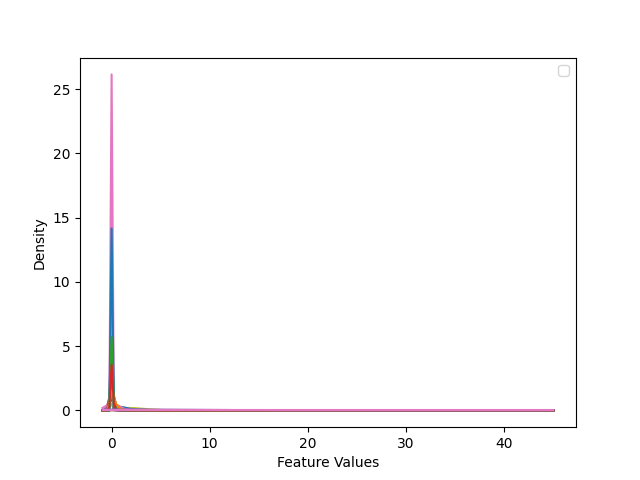

In [1189]:
# plot the distribution of the normalized data, should look the same
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(np.min(Xz), np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs))#, label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)
plt.show()

### Analysis of the Kernel Density Plot for Normalized Data

1. Density Peaks Centered Around Zero: In the normalized plot, all features show density peaks centered closely around zero. This indicates that after normalization, most feature values are near the mean (0) with a very narrow range of variance.
2.	Sharp, High Density Peaks: Each feature has a sharp peak, suggesting that the distribution of feature values is highly concentrated around the mean after normalization. This sharpness is a result of normalization reducing the spread of data values across features.
3.	Uniform X-Axis Range: All features fit within a small range on the x-axis compared to before the normalization (approximately -1 to 45), making it easier to compare the density distributions across features directly. This consistency across features emphasizes patterns in density without the influence of varying scales.

#### Analysis of Unnormalized Gaussian KDE

1. Wide Range of Densities: In the unnormalized plot, the features show a broad spread of densities, with some peaking near zero while others extend across a wide range on the x-axis (up to 25). This reflects the original variability in scales and distributions of the feature values, with certain features having very high maximum values.
2.	Skewed Distributions: Many features exhibit densities concentrated near zero with long tails extending to higher values. This skewness arises from features with large maximum values (like the feature reaching 15841), which stretches the distributions and lowers the density peaks.
3.	Flattened Peaks: The unnormalized KDE has relatively flattened peaks, especially for features with high variance or large values. This occurs because the distribution is spread out more broadly, resulting in lower, less concentrated density values.

#### Analysis of Normalized Gaussian KDE

1. Density Peaks Centered Around Zero: After normalization, all features have density peaks centered closely around zero. This indicates that the normalization process has shifted each feature to be mean-centered, removing the influence of varying scales.
2.	Sharp, High Density Peaks: Each feature now shows a sharp, high peak, meaning the density is more concentrated around the mean (0) with a narrow variance. This sharpness results from scaling down the spread of values across features.
'3.	Uniform X-Axis Range: The x-axis range is now consistent across features (approximately -1 to 3), which makes the density distributions easier to compare directly. With normalization, the patterns in density become more apparent, as all features are scaled to a comparable range.

Normalization has significantly compressed and centered the distributions of each feature. Where previously the raw KDE was influenced by high-variance features with large maximum values, the normalized KDE aligns features around a mean of zero, reducing skew and making densities comparable. Improved Concentration in Normalized KDE: The normalized KDE plot shows a clear concentration around zero, which highlights the feature distributions more uniformly. This concentration indicates that normalization has standardized the spread across features, allowing more meaningful comparisons. The normalized KDE effectively removes the skew caused by features with extreme values, as seen in the unnormalized plot. Without the influence of large values, each feature’s density distribution appears sharper and more centralized, making it easier to interpret underlying patterns.
In summary, normalization brings the feature distributions to a comparable scale, enhancing interpretability and enabling direct comparisons across features. While the unnormalized KDE captures the dataset’s raw variability and highlights features with extreme values, the normalized KDE provides a clearer, more focused view of the distribution around the mean, showing how features behave without scale-related distortions.

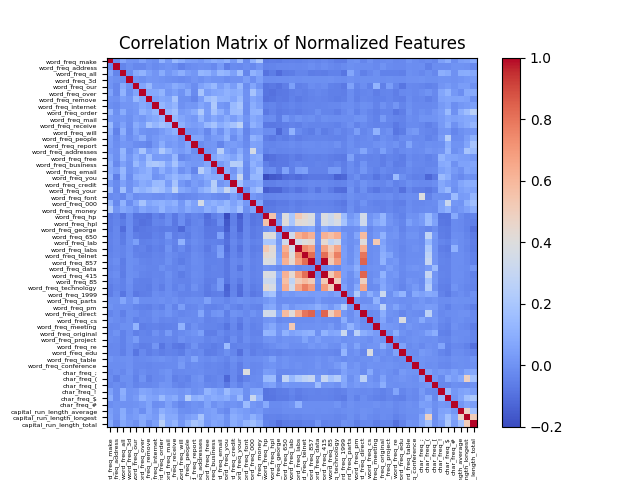

In [1190]:
# Plot the correlation matrix of the normalized data
nextplot()
correlation_matrix = np.corrcoef(Xz, rowvar=False)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(D), features, rotation=90, fontsize=4.5)
plt.yticks(range(D), features, fontsize=4.5)
plt.title('Correlation Matrix of Normalized Features')
plt.show()

### Analysis of the Correlation Matrix of Normalized Data

1. **Diagonal Elements**:
   - **Observation**: The diagonal elements of the correlation matrix are all 1.
   - **Explanation**: This is expected because each feature is perfectly correlated with itself.

2. **High Positive Correlations**:
   - **Observation**: Some off-diagonal elements have high positive values (close to 1).
   - **Implication**: These features are strongly positively correlated, indicating that they tend to increase together. This might suggest that these features capture similar information or are related to similar patterns in the data.

3. **High Negative Correlations**:
   - **Observation**: Some off-diagonal elements have high negative values (close to -1).
   - **Implication**: These features are strongly negatively correlated, indicating that as one feature increases, the other tends to decrease. This might suggest that these features capture opposing trends or patterns in the data.

4. **Clusters of Correlated Features**:
   - **Observation**: There are visible clusters or blocks of features that are highly correlated with each other.
   - **Implication**: These clusters might represent groups of features that are related to specific topics or themes in the emails. For example, certain word frequency features might cluster together if they frequently appear in the same context.

5. **Weak or No Correlation**:
   - **Observation**: Many off-diagonal elements have values close to 0.
   - **Implication**: These features are weakly correlated or uncorrelated, indicating that they provide unique information and are not linearly related to each other.

#### What sticks out

1. **Strong Correlation Patterns**:
   - The presence of strong positive and negative correlations between certain features is notable. Identifying these pairs can help in understanding the relationships between different aspects of the data.

2. **Clusters of Features**:
   - The visible clusters of correlated features are interesting as they might indicate underlying patterns or themes in the dataset. These clusters can be further analyzed to understand their significance.

3. **Sparse Correlation**:
   - The fact that many features have weak or no correlation with each other is also noteworthy. This suggests that the dataset contains a diverse set of features that capture different aspects of the data.

#### What is as Expected

1. **Diagonal Elements**:
   - The diagonal elements being 1 is expected, as each feature is perfectly correlated with itself.

2. **Standardized Scale**:
   - The correlation matrix is based on the normalized data, so the scale of the features is standardized. This ensures that the correlations are not influenced by the different scales of the original features.

The correlation matrix of the normalized data provides valuable insights into the relationships between different features. The presence of strong positive and negative correlations, as well as clusters of correlated features, highlights the underlying patterns in the data. The weak or no correlation between many features suggests that the dataset contains a diverse set of features that capture different aspects of the data. These insights can be used for feature selection, dimensionality reduction, and improving the performance of machine learning models.

# 2. Maximum Likelihood Estimation

## 2 a) Show analytically that if we use a bias term, rescaling (multiply by constant) and shifting (add a constant) features leads to ML estimates with the same likelihood. Why do you think we computed z-scores then?

--> See Project Report

## Helper functions

In [1191]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [1192]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return 1 / (1 + np.exp(-x))
    

In [1193]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[np.float64(0.5), array([0.26894142, 0.5       , 0.73105858])]

In [1194]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    return -np.log(1 + np.exp(-x))


In [1195]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[np.float64(-0.6931471805599453),
 array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient: Complete the methods for computing the log-likelihood and gradient of the log-likelihood for logistic regression. We do not use a bias term throughout.


### General Formula for the Log-Likelihood of a Logistic Regression Model

The log-likelihood function for a logistic regression model is given by:

$$
\ell(\mathbf{w}) = \sum_{i=1}^{N} \left[ y_i \log(\sigma(\mathbf{x}_i \cdot \mathbf{w})) + (1 - y_i) \log(1 - \sigma(\mathbf{x}_i \cdot \mathbf{w})) \right]
$$

where:
- $\ell(\mathbf{w})$ is the log-likelihood function.
- $N$ is the number of observations.
- $ y_i $ is the binary response variable for the $i$-th observation (0 or 1).
- $\mathbf{x}_i $ is the feature vector for the $i$-th observation.
- $ \mathbf{w}$ is the weight vector.
- $ \sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic (sigmoid) function.
- $ \mathbf{x}_i \cdot \mathbf{w} $ is the dot product of the feature vector and the weight vector.

This formula represents the sum of the log-probabilities of the observed outcomes given the model parameters.

In [1196]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    return np.sum(y * logsigma(X @ w) + (1 - y) * logsigma(-X @ w))


In [1197]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

np.float64(-47066.641667825774)

### Gradient of the Log-Likelihood for Logistic Regression

The gradient of the log-likelihood function for a logistic regression model is given by:
### Gradient of the Log-Likelihood for Logistic Regression

The gradient of the log-likelihood function for a logistic regression model is given by:
$$
\nabla \ell(\mathbf{w}) = \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{X} \mathbf{w}))
$$

where:
- $ \nabla \ell(\mathbf{w}) $ is the gradient of the log-likelihood function.
- $ \mathbf{X} $ is the design matrix of shape $(N, D)$, where $N$ is the number of observations and $D$ is the number of features.
- $ \mathbf{y} $ is the binary response variable vector of shape $(N,)$.
- $ \mathbf{w} $ is the weight vector of shape $(D,)$.
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the logistic (sigmoid) function.
- $ \mathbf{X} \mathbf{w} $ is the dot product of the design matrix and the weight vector.

This formula represents the gradient of the log-likelihood function with respect to the weight vector $ \mathbf{w} $.

#### Steps to Calculate the Gradient:

1. **Compute the linear combination of inputs and weights**:
    $z = \mathbf{X} \mathbf{w} $

2. **Apply the logistic (sigmoid) function**:
    $\sigma(z) = \frac{1}{1 + e^{-z}} $

3. **Compute the difference between the actual labels and the predicted probabilities**:
    $ \mathbf{y} - \sigma(z) $

4. **Multiply the transpose of the design matrix by the difference**:
    $ \nabla \ell(\mathbf{w}) = \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{X} \mathbf{w})) $

In [1198]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    return X.T @ (y - sigma(X @ w))

In [1199]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [1200]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05
            

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

### Mathematical Formulas for Gradient Descent

The update rule for gradient descent is given by:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \epsilon \nabla \ell(\mathbf{w}^{(t)})
$$

where:
- $ \mathbf{w}^{(t)} $ is the weight vector at iteration $ t $ (`wz_gd`).
- $ \epsilon $ is the learning rate (`ez_gd`).
- $ \nabla \ell(\mathbf{w}^{(t)}) $ is the gradient of the log-likelihood function at iteration $ t $.


In [1201]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    """
    Generates the objective function and update rule for gradient descent in logistic regression.

    Parameters:
    y (array-like): The target values.
    X (array-like): The input features.

    Returns:
    tuple: A tuple containing two functions:
        - objective(w): Computes the negative log-likelihood of the logistic regression model for given weights `w`.
        - update(w, eps): Updates the weights `w` using the gradient descent learning rule with learning rate `eps`.
    """
    def objective(w):
        """negative Log-likelihood of the logistic regression model. This is our MLE estimate."""
        return -l(y, X, w)

    def update(w, eps):
        """Learning rule for Gradient descent in one epoch for logistic regression and some learning rate eps>0."""
        return w + eps * dl(y, X, w)

    return (objective, update)

In [1202]:
# this should give
# [47066.641667825766, # here might be an error in the solution
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[np.float64(47066.641667825774),
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+

In [1203]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
print("Initial weight vector (w0):")
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)
print("Final weight vector (wz_gd):", wz_gd)

Initial weight vector (w0):
Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=

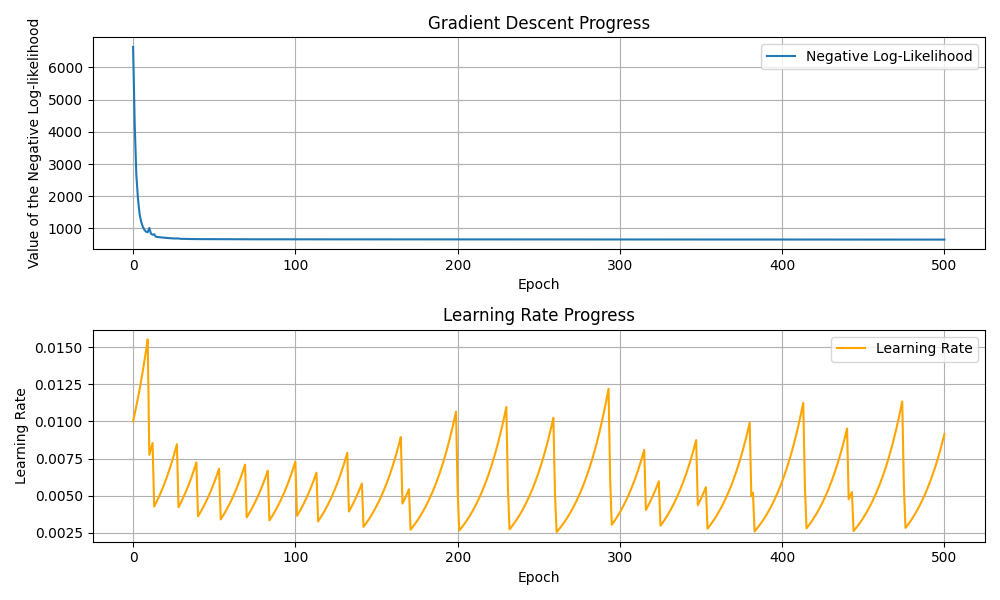

In [1204]:
# look at how gradient descent made progress
# Visualize the gradient descent progress
plt.figure(figsize=(10, 6))

# Plot the log-likelihood
plt.subplot(2, 1, 1)
plt.plot(vz_gd, label='Negative Log-Likelihood')
plt.xlabel('Epoch')
plt.ylabel('Value of the Negative Log-likelihood')
plt.title('Gradient Descent Progress')
plt.legend()
plt.grid(True)

# Plot the learning rate
plt.subplot(2, 1, 2)
plt.plot(ez_gd, label='Learning Rate', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Progress')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis of the gradient descent progress

The gradient descent progress plot shows the progression of the negative log-likelihood over the number of epochs. At the beginning, at epoch 0, we see a very high negative log-likelihood of around 6500, which indicates that the model is initially still very poorly fitted to the data. In the first 10 epochs, the negative log-likelihood then drops very quickly, indicating that the gradient descent algorithm makes rapid progress in optimization at the beginning. At epoch 10, there is a slight spike in the curve, which could indicate an adjustment of the learning rate by the bold driver heuristic, since possibly too large a step led to an increase in costs and an adjustment of the learning rate became necessary. Thereafter, the curve becomes increasingly flatter and the negative log-likelihood stabilizes at around 700, indicating that the gradient descent is approaching a local minimum from which the value of the function improves only slightly.

This flatter curve later in the process is typical of optimization processes that converge, as the size of the parameter updates becomes smaller and smaller as the parameters approach the optimal point. The model appears to have reached the best solution (given the starting parameters and the chosen learning rate) that it can find, with the negative log-likelihood remaining around 700.


### Analysis of the learning rate progress

In the learning rate progress plot, we can see that the learning rate initially rises sharply and then shows a changing pattern. It decreases and increases repeatedly and shows a “jagged” behavior. This oscillation is caused by the bold driver heuristic, which dynamically adjusts the learning rate: If an update successfully decreases the cost function, the learning rate is increased by 5%. However, if an update leads to an increase in the cost function, the learning rate is reduced by half. This mechanism leads to a fluctuating learning rate, which, however, gradually decreases on average.

This behavior indicates that the gradient descent algorithm makes some effective steps at the beginning, but occasionally performs updates that increase the cost, resulting in a halving of the learning rate. The downward trend of the minimum learning rate shows that the heuristic leads to an overall gradual reduction of the learning rate as the model approaches the optimum. This is desirable, as smaller steps near the optimum help to hit the target more accurately instead of jumping past the minimum with large steps.


### Conclusions on the minimization problem and the bold driver heuristic

Minimization problem: The goal of the minimization problem is to minimize the negative log-likelihood, i.e. to fit the likelihood of the model to the data. The rapid decrease of the negative log-likelihood at the beginning shows that Gradient Descent effectively solves the minimization problem and rapidly improves the parameterization. The flatter progression from epoch 15 onwards shows that the model has reached a kind of plateau where progress is marginal. This indicates a convergence towards a local optimum.

Bold driver heuristic: The bold driver heuristic plays an important role in adjusting the learning rate depending on the behavior of the cost function. Its oscillating and decreasing shape in the plot is a direct result of this heuristic. It helps to take large steps at the beginning and make rapid progress, but also to reduce the learning rate as the model approaches the optimum in order to make more accurate adjustments. This prevents the learning rate from remaining constant, which could lead to instability for large values and slow convergence for small values.


## 2d Stochastic gradient descent


### Mathematical Formulas for Stochastic Gradient Descent

The update rule for stochastic gradient descent is given by:

 $$
      \mathbf{w}^{(n+1)} = \mathbf{w}^{(n)} + \epsilon_n \hat{\nabla} \ell(w|X, y)
      $$

where:
- $ \mathbf{w}^{(n)} $ is the weight vector at iteration $ n $.
- $ \epsilon_n $ is the learning rate at iteration $ n $.
- $ \hat{\nabla} \ell(w|X, y) $ is the approximate gradient of the log-likelihood function with respect to the weight vector $ w $.
- $ y_i $ is the binary response variable for the $ i $-th observation.

### Steps for an SGD Epoch (with or without replacement)

1. **Pick a random example $ z $ (with or without replacement)**:
    - Select a random data point from the dataset. This can be done with or without replacement.
    
2. **Compute approximate gradient $ \hat{\nabla}_{w^\top} - \ell(w|X, y) $**:
    - Calculate the gradient of the log-likelihood function with respect to the selected data point.
    
3. **Update parameters**:
    - Update the weight vector using the computed gradient and the learning rate.
4. **Repeat N times**:
    - Repeat the above steps for $ N $ iterations, where $ N $ is the number of data points in the dataset.

In [1205]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).

    indices = np.random.permutation(len(y)) # pick a random example z
    for i in indices:
        gradient = (y[i] - sigma(np.dot(X[i], w))) * X[i] # computation of the approximate gradient
        w = w + eps * gradient
    return w

In [1206]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [1207]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [1208]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[np.float64(40.864973045695095),
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+

In [1209]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)
print("Final weight vector (wz_sgd):", wz_sgd)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

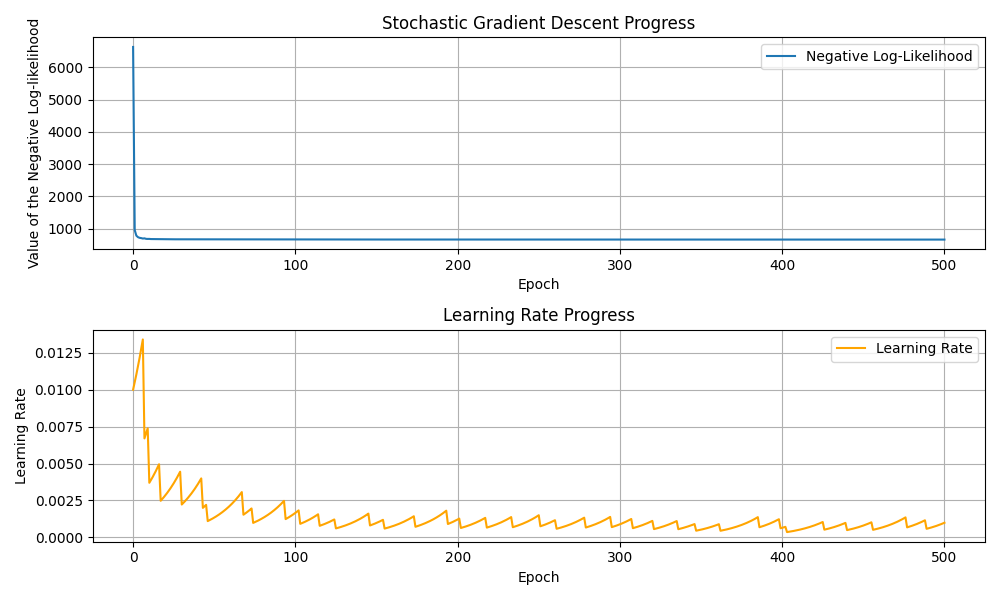

In [1210]:
# Visualize the stochastic gradient descent progress
plt.figure(figsize=(10, 6))

# Plot the log-likelihood
plt.subplot(2, 1, 1)
plt.plot(vz_sgd, label='Negative Log-Likelihood')
plt.xlabel('Epoch')
plt.ylabel('Value of the Negative Log-likelihood')
plt.title('Stochastic Gradient Descent Progress')
plt.legend()
plt.grid(True)

# Plot the learning rate
plt.subplot(2, 1, 2)
plt.plot(ez_sgd, label='Learning Rate', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Progress')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Analysis of the Stochastic Gradient Progress

At the beginning of the training process, the negative log-likelihood value reaches a very high initial value of around 6,500, which indicates the initial distance between the model and the target distribution. After the first epoch, there is a dramatic drop to around 1,000. This significant drop is typical for SGD and indicates that major adjustments are made to the model in the first updates in order to quickly achieve a better approximation to the target distribution.

After this sharp initial drop, the value remains relatively stable at around 700, indicating a plateau in which the model achieves only minor improvements. This plateau reflects a phase of stochastic gradient descent in which the updates are only small steps and the model is closer to a local minimum. Since the process is stochastic, a certain amount of fluctuation remains, but without significant deviations from the plateau.

### Analysis of the Learning Rate Progress

The learning rate shows a structure that has a high swing to 0.0125 to 0.013 at the beginning. This initial increase is often caused by mechanisms such as learning rate schedulers or an initial increase in the learning rate in order to support rapid progress in the first epoch and achieve a rapid approach to the target distribution.

After this increase, the learning rate continuously decreases and stabilizes to a minimum of about 0.001. The relatively smooth structure of the learning rate shows that the downward movements are more regular and less abrupt, which promotes convergence. The regular shape and the reduction of the swings in the further course indicate that the model only makes fine adjustments to the parameters in this phase.

These trends can be explained by the nature of SGD: at the beginning, when the error is large, a high learning rate encourages fast and large steps to quickly steer the model towards a minimum. As the model approaches this minimum, the decreasing learning rate reduces the step size to increase stability and minimize oscillations. The regular, smaller deflections ultimately support fine adjustment and stability in the optimization.



## 2e Compare GD and SGD

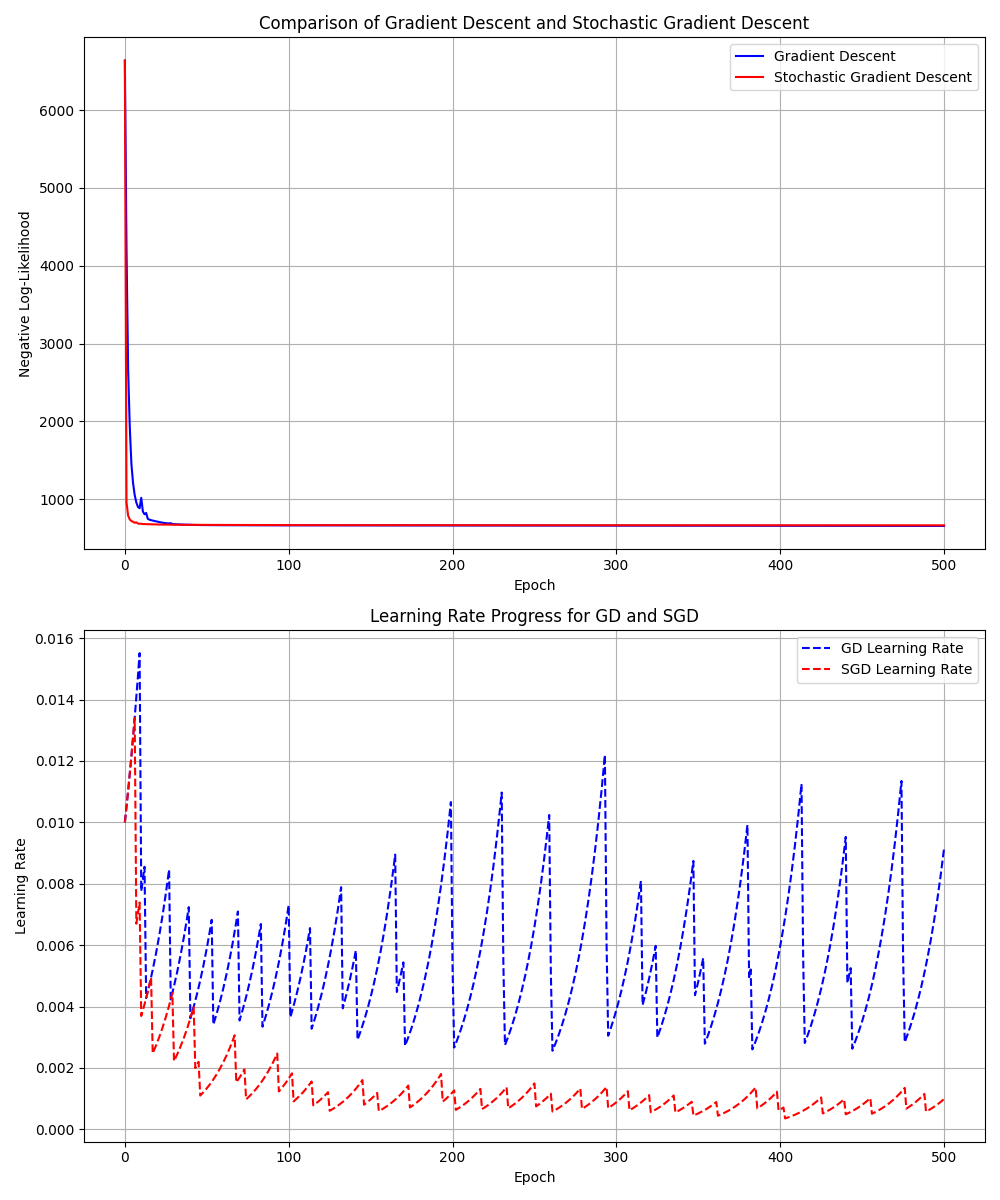

In [1211]:
# Visualize the comparison of gradient descent and stochastic gradient descent progress
plt.figure(figsize=(10, 12))

# Plot the log-likelihood values for gradient descent and stochastic gradient descent
plt.subplot(2, 1, 1)
plt.plot(vz_gd, label='Gradient Descent', color='blue')
plt.plot(vz_sgd, label='Stochastic Gradient Descent', color='red')
plt.xlabel('Epoch')
plt.ylabel('Negative Log-Likelihood')
plt.title('Comparison of Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.grid(True)

# Plot the learning rate values for gradient descent and stochastic gradient descent
plt.subplot(2, 1, 2)
plt.plot(ez_gd, label='GD Learning Rate', color='blue', linestyle='--')
plt.plot(ez_sgd, label='SGD Learning Rate', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Progress for GD and SGD')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Comparative Analysis of Gradient Descent and Stochastic Gradient Descent Progress

Both the Gradient Descent (GD) and Stochastic Gradient Descent (SGD) plots reveal common optimization behaviors, though the methods’ inherent differences in update frequency and data handling produce distinct outcomes in the negative log-likelihood and learning rate trends.

#### Negative Log-Likelihood Progression

In the progression of the negative log-likelihood, both GD and SGD start with high initial values around 6,500, indicating a poor initial fit to the data. Both methods then display a rapid initial decrease, as they make large adjustments to the model’s parameters. This is typical in early training stages, where the large error signals encourage substantial parameter shifts toward reducing the cost function.

However, the path to the plateau is distinctly different for each method:

- Gradient Descent: GD’s negative log-likelihood curve experiences a spike around epoch 10, likely due to the bold driver heuristic adjusting the learning rate following an overly large step. After this correction, GD stabilizes around a value of 700, but this convergence has more visible fluctuations than SGD, particularly around the transition from high error to lower values. These fluctuations, or “peaks,” reflect the adaptive adjustments of the learning rate, which responds to the progress in the cost function.
- Stochastic Gradient Descent: In contrast, SGD shows a notably smooth descent to its plateau around the same value of 700. After a sharp decrease in the first epoch, SGD maintains a steady, uninterrupted approach to the minimum without the peaks seen in GD. This smoother path is due to the smaller, more frequent updates in SGD, which allow for a gradual approach toward the minimum without triggering large corrective adjustments. This characteristic smoothness reflects SGD’s ability to stabilize even with smaller learning rates, which leads to finer, more controlled parameter adjustments.

#### Learning Rate Behavior

The learning rate progression further highlights the differences in convergence dynamics between GD and SGD:

- Gradient Descent: In GD, the learning rate exhibits substantial fluctuations over time, particularly early in training, as it dynamically adjusts to cost function changes. This fluctuation often translates into noticeable peaks in the learning rate values, particularly around the time when the algorithm adjusts the learning rate sharply in response to an increase in cost (as seen near epoch 10). Additionally, GD’s learning rate remains relatively high even as training nears completion, which allows for steady updates but can result in slower fine-tuning due to larger step sizes at later stages.
- Stochastic Gradient Descent: Conversely, SGD’s learning rate follows a more stable, “zigzag” pattern with smaller absolute fluctuations in value, leading to smoother convergence. The regular oscillations are more frequent, with each cycle occurring twice as fast as in GD, indicating more adaptive but less disruptive updates. SGD’s learning rate decreases more gradually and consistently over time, allowing the model to approach the minimum with finer precision in each step. This regular pattern in learning rate adjustment supports the smoothness of the log-likelihood curve, as each update becomes progressively smaller and more targeted near the optimum.

#### Theoretical Basis for Observed Results

These observed behaviors are closely linked to each method’s theoretical approach to optimization:

- Full-Batch Updates in Gradient Descent: GD uses full-batch updates, making a single, large step based on the complete dataset at each epoch. The bold driver heuristic dynamically adjusts the learning rate to manage step sizes, which can result in larger fluctuations, particularly when an increase in the cost function triggers a correction. This batch-based approach and the higher absolute learning rate can cause abrupt changes in the learning rate or log-likelihood curve, as seen around epoch 10.
- Frequent, Smaller Updates in Stochastic Gradient Descent: By updating parameters more frequently with smaller batches of data, SGD takes advantage of smaller, quicker steps. This frequency, coupled with a more gradual learning rate decay, results in the smoother convergence pattern and absence of corrective peaks. The frequent updates also allow SGD to adapt continuously to local gradients, enabling it to navigate the cost landscape more fluidly without sharp learning rate adjustments or large oscillations.


#### Summary of Insights

The comparison reveals that GD achieves a more stable but potentially slower convergence, leveraging full-batch updates and dynamic rate adjustments to ensure steady progress. SGD, however, favors quicker initial improvements through stochastic sampling and a gradually decaying learning rate, facilitating rapid approximation of the target distribution with moderate fluctuation.

Overall, both methods converge to a similar cost function minimum, though SGD’s stochasticity and rate decay mechanisms produce an oscillatory path, adapting dynamically to the optimization landscape, while GD’s more deterministic path minimizes variability near the minimum.

# 3 Prediction

In [1212]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
    weight vector w."""
    return sigma(Xtest @ w)

def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
    weight vector w."""
    return (predict(Xtest, w) >= 0.5).astype(int)


In [1213]:
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[876  65]
 [ 88 507]]


In [1214]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       941
           1       0.89      0.85      0.87       595

    accuracy                           0.90      1536
   macro avg       0.90      0.89      0.89      1536
weighted avg       0.90      0.90      0.90      1536



In [1215]:
yhat2 = predict(Xtestz, wz_sgd)
ypred2 = classify(Xtestz, wz_sgd)
print(sklearn.metrics.confusion_matrix(ytest, ypred2))  # true x predicted

[[877  64]
 [ 87 508]]


In [1216]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       941
           1       0.89      0.85      0.87       595

    accuracy                           0.90      1536
   macro avg       0.90      0.89      0.90      1536
weighted avg       0.90      0.90      0.90      1536



### Confusion Matrix Analysis
The confusion matrix for the classification of `ytest` based on the normalized input data `Xtestz` is as follows for the GD:

- **True Positives (TP)**: 507, these are the instances where the model correctly predicted the positive class (spam).
     
- **True Negatives (TN)**: 876, these are the instances where the model correctly predicted the negative class (non-spam).
     
    
- **False Positives (FP)**: 65, these are the instances where the model incorrectly predicted the positive class (spam) when it was actually negative (non-spam).
    
- **False Negatives (FN)**: 88, These are the instances where the model incorrectly predicted the negative class (non-spam) when it was actually positive (spam).


The confusion matrix for the classification of `ytest` based on the normalized input data `Xtestz` is as follows for the SGD:

- **True Positives (TP)**: 508, these are the instances where the model correctly predicted the positive class (spam).
     
- **True Negatives (TN)**: 878, these are the instances where the model correctly predicted the negative class (non-spam).
     
- **False Positives (FP)**: 63, these are the instances where the model incorrectly predicted the positive class (spam) when it was actually negative (non-spam).
     
- **False Negatives (FN)**: 87, These are the instances where the model incorrectly predicted the negative class (non-spam) when it was actually positive (spam).

### Comparison

When comparing the results of Gradient Descent (GD) and Stochastic Gradient Descent (SGD) for spam mail classification, we observe the following:

- **True Positives (TP)**: SGD has 508, while GD has 507. This indicates that SGD correctly identifies slightly more spam emails than GD.
- **True Negatives (TN)**: SGD has 878, while GD has 876. This indicates that SGD correctly identifies slightly more non-spam emails than GD.
- **False Positives (FP)**: SGD has 63, while GD has 65. This indicates that GD incorrectly identifies slightly more non-spam emails as spam compared to SGD.
- **False Negatives (FN)**: SGD has 87, while GD has 88. This indicates that SGD incorrectly identifies slightly fewer spam emails as non-spam compared to GD.

This leads to the following evaluation:

- **Spam Detection**: SGD performs slightly better in detecting spam emails (higher TP and lower FN) compared to GD. This is crucial for spam mail classification as it reduces the number of spam emails that go undetected.
- **Non-Spam Detection**: GD performs slightly better in detecting non-spam emails (higher TN and lower FP) compared to SGD. This is important to minimize the number of legitimate emails incorrectly classified as spam.

Overall, if the primary goal is to maximize spam detection and minimize the number of spam emails that go undetected, SGD is slightly better. However, if the goal is to minimize the misclassification of legitimate emails as spam, GD is slightly better. The choice between SGD and GD should be based on the specific priorities and requirements of the spam mail classification task.


### Metrics

In the following, we evaluate the evaluation metrics exemplary for GD. The data for SGD follows below.

1. **Accuracy**:
     $$
     \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{507 + 876}{507 + 876 + 65 + 88} \approx 0.9004
     $$
     - The model correctly classified approximately 90.04% of the instances.

2. **Precision**:
     $$
     \text{Precision} = \frac{TP}{TP + FP} = \frac{507}{507 + 65} \approx 0.8863
     $$
     - The precision indicates that approximately 88.63% of the instances predicted as spam are actually spam.

3. **Recall**:
     $$
     \text{Recall} = \frac{TP}{TP + FN} = \frac{507}{507 + 88} \approx 0.8521
     $$
     - The recall indicates that approximately 85.21% of the actual spam instances were correctly identified by the model.

4. **F1 Score**:
     $$
     \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \approx 0.8690
     $$
     - The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.


We can conclude that the model has the following performance metrics:

- **High Accuracy**: The model demonstrates high accuracy, correctly classifying 90.04% of the instances. This indicates that the model performs well overall in distinguishing between spam and non-spam emails.

- **Balanced Precision and Recall**: The precision (88.63%) and recall (85.21%) are relatively balanced, suggesting that the model is effective at identifying spam emails while maintaining a low rate of false positives.

- **False Negatives**: There are 88 false negatives, meaning some spam emails are misclassified as non-spam. This could be a concern in applications where missing spam emails is critical.

- **False Positives**: There are 65 false positives, meaning some non-spam emails are misclassified as spam. This could be a concern in applications where incorrectly flagging non-spam emails as spam is critical.

Overall, the model shows strong performance with high accuracy, precision, and recall. However, depending on the application, further tuning may be required to reduce false negatives or false positives.

From the classification report for the Stochastic Gradient Descent (SGD) model we can draw the following conclusions:

- **High Precision and Recall for Non-Spam**: The model performs very well in identifying non-spam emails, with high precision (0.91) and recall (0.93). This indicates that the model is effective at minimizing false positives (non-spam emails incorrectly classified as spam) and false negatives (spam emails incorrectly classified as non-spam).

- **Good Performance for Spam Detection**: The model also performs well in identifying spam emails, with a precision of 0.89 and recall of 0.85. This is crucial for spam classification as it reduces the number of spam emails that go undetected.

- **Balanced Metrics**: The F1-scores for both classes are relatively high (0.92 for non-spam and 0.87 for spam), indicating a good balance between precision and recall.

- **Overall Accuracy**: With an overall accuracy of 90%, the model demonstrates strong performance in distinguishing between spam and non-spam emails.


### Comparative Performance Analysis of GD and SGD

The overall accuracy of both models is approximately 90%, indicating that both methods are effective in distinguishing between spam and non-spam emails. Both models exhibit balanced precision and recall metrics, suggesting that they are both effective at identifying spam emails while maintaining a low rate of false positives.

Overall, both methods converge to a similar cost function minimum, though SGD’s stochasticity and rate decay mechanisms produce an oscillatory path, adapting dynamically to the optimization landscape, while GD’s more deterministic path minimizes variability near the minimum. The choice between SGD and GD should be based on the specific priorities and requirements of the spam mail classification task. If the primary goal is to maximize spam detection and minimize the number of spam emails that go undetected, SGD is slightly better. However, if the goal is to minimize the misclassification of legitimate emails as spam, GD is slightly better.

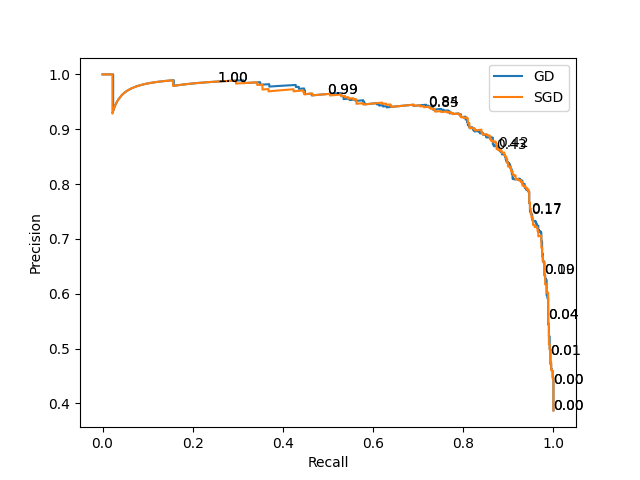

In [1217]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()

# Plot for ytest and yhat
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision, label='GD')
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))

# Plot for ytest2 and yhat2
precision2, recall2, thresholds2 = sklearn.metrics.precision_recall_curve(ytest, yhat2)
plt.plot(recall2, precision2, label='SGD')
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision2.size - 1))
    plt.text(recall2[index], precision2[index], "{:3.2f}".format(thresholds2[index]))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### Precision-Recall Curve

The evaluation of your spam classification dataset using precision-recall (PR) curves for both gradient descent (GD) and stochastic gradient descent (SGD) describes the performance of each algorithm in handling this classification task. Let’s break down what this PR curve tells us and interpret the implications for each optimization method.

Understanding the Precision-Recall Curve Shape

1. **High Initial Precision, Low Recall:** Both curves start at a precision of 1, indicating that for the initial predictions, both GD and SGD are highly precise (few false positives) but have low recall. This suggests that the classifiers are initially conservative, identifying only the most obvious spam samples.
	
2.	**Precision Drop at Low Recall:** A rapid drop in precision as recall increases from very low values is noted, meaning that as the models begin to capture more spam samples, they also begin to introduce more false positives. This trend is common in classification tasks where a model starts with a high threshold for classification, only tagging the most certain spam messages before expanding to capture less obvious cases.
	
3.	**Precision Rise in Moderate Recall (0.2-0.4):** Between recall values of 0.2 and 0.4, there’s a notable increase in precision back to 1.0. This is an unusual pattern and may indicate that the model is encountering a clearer separation in the data at this stage, possibly due to fewer ambiguous samples. It might suggest that these particular recall levels capture a subset of the data where the model has high confidence and accuracy.
	
4.	**Gradual Precision Decline up to Recall 0.9:** The steady decline in precision as recall continues to increase up to about 0.9 reflects the natural trade-off in binary classification as the model tries to capture more spam samples. Here, as more messages are labeled as spam, false positives gradually increase, reducing precision but not dramatically.
	
5.	**Rapid Precision Drop at High Recall (>0.9):** The rapid fall in precision from 0.9 recall onwards to 0.0 at recall 1.0 shows that at very high recall, the model starts misclassifying non-spam messages as spam more frequently. This reflects the model’s increasing difficulty in distinguishing spam from non-spam as it tries to maximize recall.


Both GD and SGD yield similar curves, indicating they reach similar precision-recall trade-offs and performance levels on this dataset. However, there are subtle differences:

**Gradient Descent (GD):**
- GD’s curve drops a bit slower in the initial stages, meaning it maintains a slightly higher precision at low recall compared to SGD. This might reflect GD’s tendency to converge more smoothly due to its reliance on the full dataset for each update, leading to a more stable and consistent learning path.
- GD is often more stable but computationally intensive as it computes gradients over the entire dataset. This stability can result in slightly better performance at the start when precision is prioritized over recall, particularly if the dataset is small or well-behaved.

**Stochastic Gradient Descent (SGD):**
- SGD’s curve shows a slightly quicker precision drop in the initial stages, reflecting its stochastic nature, where each update is based on a single or small batch of samples. This can lead to more variance and slightly less precision initially, especially if the sample updates introduce noise or inconsistent learning paths.
- However, SGD still approximates the overall curve of GD quite well, demonstrating that it is capable of reaching comparable performance but with faster convergence. SGD is also more suitable for larger datasets, where its computational efficiency and ability to generalize well are advantageous.

**Practical Implications**
- Comparable End Performance: The similarity in the PR curves indicates that both GD and SGD can achieve nearly identical performance on this spam classification dataset, suggesting that SGD’s faster updates do not sacrifice end results for this specific task.
- Initial Stability of GD: GD’s slightly more stable initial precision may be beneficial in situations where high precision is critical at low recall. This might be useful for early-stage model tuning if avoiding false positives is prioritized initially.
- Efficiency of SGD: Given that SGD can approximate the performance of GD but with potentially faster convergence, it would likely be more efficient for iterative training, especially if the dataset grows. SGD is particularly useful if computational resources are limited or if online learning (real-time updates) is required.

In summary, this PR curve suggests that both GD and SGD are effective for this spam classification problem, with GD offering a slightly more stable performance initially and SGD providing efficiency gains without sacrificing much in terms of final model quality. The choice between the two might depend on dataset size, computational constraints, and specific needs for stability or convergence speed.

In [1218]:
# Explore which features are considered important
print("Final weight vector (wz_gd):", wz_gd)
print("Final weight vector (wz_sgd):", wz_sgd)

# Find the indices of the five highest and lowest absolute weights for GD
highest_gd_indices = np.argsort(np.abs(wz_gd))[-5:]
lowest_gd_indices = np.argsort(np.abs(wz_gd))[:5]

# Find the indices of the five highest and lowest absolute weights for SGD
highest_sgd_indices = np.argsort(np.abs(wz_sgd))[-5:]
lowest_sgd_indices = np.argsort(np.abs(wz_sgd))[:5]

print("Top 5 highest absolute weights for GD:")
for idx in highest_gd_indices:
    print(f"Feature: {features[idx]}, Weight: {wz_gd[idx]}")

print("\nTop 5 lowest absolute weights for GD:")
for idx in lowest_gd_indices:
    print(f"Feature: {features[idx]}, Weight: {wz_gd[idx]}")

print("\nTop 5 highest absolute weights for SGD:")
for idx in highest_sgd_indices:
    print(f"Feature: {features[idx]}, Weight: {wz_sgd[idx]}")

print("\nTop 5 lowest absolute weights for SGD:")
for idx in lowest_sgd_indices:
    print(f"Feature: {features[idx]}, Weight: {wz_sgd[idx]}")

Final weight vector (wz_gd): [-8.86805803e-03 -1.87711722e-01  1.21527679e-01  8.08625721e+00
  2.59086182e-01  1.81011961e-01  1.15333583e+00  2.90298799e-01
  1.13527420e-01  6.60449223e-02 -4.68398587e-02 -1.65669222e-01
 -6.53149090e-02 -1.09479222e-02  4.94021994e-01  8.43700154e-01
  5.63710277e-01  5.46097770e-02  2.89015689e-01  2.84882797e-01
  2.17373273e-01  6.64971958e-01  1.46174692e+00  2.54294549e-01
 -2.07767632e+00 -2.64575174e-01 -1.41614626e+00 -1.47368318e-03
 -3.06163147e-01 -3.12258163e-02  4.18300416e-02  1.28949980e+00
 -3.28686051e-01 -1.22486766e+00 -8.94396839e-02  4.03419808e-01
  4.58896319e-02 -1.52073801e-01 -3.18849236e-01 -2.15088329e-01
 -2.17999766e-01 -7.68176094e-01 -2.41103469e-01 -6.14325300e-01
 -7.98221834e-01 -1.05010623e+00 -1.49903381e-01 -6.40578227e-01
 -5.06152873e-01 -2.01326929e-01 -1.08442215e-01  2.37141619e-01
  2.18926566e+00  1.15453951e+00 -5.17771557e-01  2.31366068e+00
  2.14950198e-01]
Final weight vector (wz_sgd): [-0.00781726 



### Exploration of the Models and Weight Vector Composition

In the previous tasks, we fitted logistic regression models using both Gradient Descent (GD) and Stochastic Gradient Descent (SGD). Now, we will explore the composition of the weight vectors obtained from these models and discuss the importance of different features.

#### Weight Vectors

From the weight vectors, we can identify the features with the highest absolute weights, as these are the most influential in the model's predictions.

- **Highest absolute weights for Gradient Descent (GD)**:
     - `word_freq_3d` (8.08625721)
     - `capital_run_length_longest` (2.31366068)
     - `char_freq_$` (2.18926566)
     - `word_freq_hp` (-2.07767632)
     - `word_freq_000` (1.46174692)

- **Highest absolute weights for Stochastic Gradient Descent (SGD)**:
     - `word_freq_3d` (3.9240358)
     - `char_freq_$` (2.25442243)
     - `capital_run_length_longest` (2.18803996)
     - `word_freq_hp` (-2.00540782)
     - `word_freq_000` (1.61055039)

In the same way we can identify the features with the lowest absolute values, that are the least important features regarding the prediction.
- **Lowest absolute weights for GD**:
     - `word_freq_650` (-0.0014736831769018046)
     - `word_freq_make` (-0.00886805802966315)
     - `word_freq_report` (-0.010947922246377455)
     - `word_freq_labs` (-0.031225816314696665)
     - `word_freq_telnet` (0.04183004164306438)

- **Lowest absolute weights for SGD**:
     - `word_freq_make` (-0.007125580348096393)
     - `word_freq_650` (0.010985716032448935)
     - `word_freq_report` (-0.012629005057883239)
     - `word_freq_labs` (-0.03979797671435514)
     - `word_freq_1999` (0.04488523681438876)

#### Evaluation

The analysis of the weight vectors from both Gradient Descent (GD) and Stochastic Gradient Descent (SGD) reveals that certain features have a significant impact on the model's predictions. 

- **High Weights**:
     - Features such as `word_freq_3d`, `capital_run_length_longest` and `char_freq_$` have high positive weights in both models. This indicates that the presence of these features strongly increases the likelihood of an email being classified as spam. This is intuitive because these features are often associated with spam emails, which tend to have longer capital runs and specific character frequencies. The difference in weights for `word_freq_3d` between GD (8.086) and SGD (3.924) can be attributed to the inherent differences in how these optimization algorithms update the weights during training.
     
- **Negative Weights**:
     - Features like `word_freq_hp` have high negative weights, suggesting that their presence decreases the likelihood of an email being classified as spam. This is also intuitive as these words might be more common in legitimate emails, particularly those related to technical or business contexts. 

- **Moderate Weights**:
     - Other features such as `word_freq_000` have moderate weights, indicating their relevance but not as strong as the top features. These numbers are commonly found in both spam and non-spam emails, hence their moderate influence.
     The analysis of the lowest weight vectors from both Gradient Descent (GD) and Stochastic Gradient Descent (SGD) provides insights into features that have a minimal impact on the model's predictions.

The high weights for features like `word_freq_3d` and `capital_run_length_total` align with common characteristics of spam emails, making the model's behavior intuitive. Conversely, features with negative weights, such as `word_freq_hp`, are more indicative of non-spam emails. 

The comparison of the lowest weight vectors from both Gradient Descent (GD) and Stochastic Gradient Descent (SGD) reveals the features that have minimal impact on the model's predictions.

- **Magnitude and Significance**:
  - The lowest weights in GD and SGD are relatively close in magnitude, indicating that both optimization methods agree on the insignificance of these features. For instance, `word_freq_650` has a weight of -0.001 in GD and 0.011 in SGD. This consistency suggests that these features do not contribute significantly to the model's decision-making process. They might be common in both spam and non-spam emails, hence their minimal influence on the classification outcome. In the GD this feature diminishes the chance that the email is classified as spam while in the SGD it is the other way around. Due to the small influence it does not make a huge difference anyway.

- **Feature Analysis**:
  - Features like `word_freq_make`, `word_freq_report`, and `word_freq_labs` appear in the lowest weights for both GD and SGD. This reinforces the idea that these features are universally deemed unimportant, regardless of the optimization method used. The presence of `word_freq_telnet` and `word_freq_1999` in the lowest weights for GD and SGD respectively, suggests that these specific terms are not strong indicators of spam in the dataset used. Here, both values have a negative impact, meaning that their occurency diminishes the chance that the mail is classified as spam.


Understanding the features with the lowest weights helps in simplifying the model by potentially removing irrelevant features. This can lead to more efficient training and inference, as the model can focus on the most impactful features. The consistency in the lowest weights between GD and SGD reinforces the reliability of the model's feature selection process. It confirms that certain features are universally deemed unimportant, which can guide feature engineering efforts in future iterations of the model. The analysis highlights that certain words or terms, despite being present in the dataset, do not significantly influence the classification of emails as spam or non-spam. This can be due to their common occurrence in both types of emails or their lack of distinguishing between the two classes.

In conclusion, the comparison of the highest and lowest weights in both GD and SGD provides valuable insights into feature importance and model optimization. The slight differences between the two methods are expected due to their inherent characteristics, but overall, they offer a consistent understanding of which features are least impactful in spam classification. This knowledge can be leveraged to refine the model and enhance its efficiency.

The weight vectors from both GD and SGD highlight the importance of certain features in distinguishing between spam and non-spam emails. The high weights for features like `word_freq_3d` and `capital_run_length_longest` align with common characteristics of spam emails, making the model's behavior intuitive. Conversely, features with negative weights, such as `word_freq_hp`, are more indicative of non-spam emails. Overall, the models demonstrate a logical and interpretable approach to spam classification, leveraging key features effectively.

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

### Mathematical Formulas for Gradient Descent for MAP Estimation with Logistic Regression and Gaussian Priors

#### Maximum A Posteriori (MAP) Estimation

MAP estimation combines the likelihood of the data with a prior distribution over the parameters. For logistic regression with Gaussian priors, the MAP estimate is obtained by maximizing the posterior distribution.

The posterior distribution for logistic regression with Gaussian priors is given by:

$$
P(\mathbf{w} | \mathbf{X}, \mathbf{y}) \propto P(\mathbf{y} | \mathbf{X}, \mathbf{w}) P(\mathbf{w})
$$

where:
- $ P(\mathbf{y} | \mathbf{X}, \mathbf{w}) $ is the likelihood of the data given the parameters.
- $ P(\mathbf{w}) $ is the prior distribution over the parameters.

#### Gaussian Prior

The Gaussian prior over the parameters $ \mathbf{w} $ is given by:

$$
P(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{0}, \mathbf{I}) = \frac{1}{(2\pi)^{D/2}} \exp\left(-\frac{1}{2} \mathbf{w}^\top \mathbf{w}\right)
$$

where:
- $ \mathbf{0} $ is the mean vector (assumed to be zero).
- $ \mathbf{I} $ is the identity matrix (assuming unit variance for simplicity).

#### Log-Posterior (Objective Function)

The log-posterior (objective function) for MAP estimation is given by:

$$
\log P(\mathbf{w} | \mathbf{X}, \mathbf{y}) = \log P(\mathbf{y} | \mathbf{X}, \mathbf{w}) + \log P(\mathbf{w}) =  \log P(\mathbf{y} | \mathbf{X}, \mathbf{w}) - \frac{1}{2} \mathbf{w}^\top \mathbf{w}
$$

#### Gradient Descent Update Rule for MAP Estimation

The gradient descent update rule for MAP estimation can be derived by combining the gradient of the log-likelihood with the gradient of the log-prior. The update rule with weight decay is given by:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \epsilon \left( \nabla \ell(\mathbf{w}^{(t)}) - \mathbf{w}^{(t)} \right)
$$

where:
- $ \mathbf{w}^{(t)} $ is the weight vector at iteration $ t $.
- $ \epsilon $ is the learning rate.
- $ \nabla \ell(\mathbf{w}^{(t)}) $ is the gradient of the log-likelihood function at iteration $ t $.
- $ \mathbf{w}^{(t)} $ is the gradient of the log-prior (which is simply $ \mathbf{w} $ for a Gaussian prior with mean 0 and variance 1).

In [1219]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    log_prior = -0.5 * lambda_ * np.sum(w ** 2)
    log_likelihood = l(y, X, w)
    return log_likelihood + log_prior

In [1220]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[np.float64(-47066.641667825774), np.float64(-47312.62381068292)]

In [1221]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""

    return dl(y, X, w) - lambda_ * w

In [1222]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [1223]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):

    def objective(w):
        return -l_l2(y, X, w, lambda_) # minimize negative log-likelihood with L2 regularization

    def update(w, eps):
        return w + eps * dl_l2(y, X, w, lambda_) # update rule for gradient descent with L2 regularization

    return (objective, update)


In [1224]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

## 4b Effect of Prior

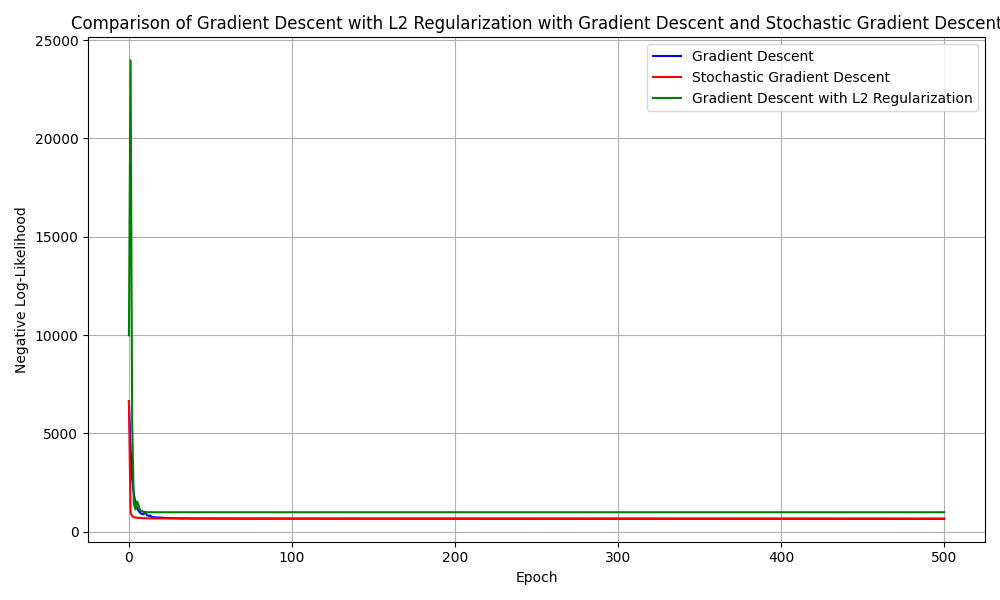

In [1225]:
# Visualize the comparison of gradient descent and stochastic gradient descent progress
plt.figure(figsize=(10, 6))

# Plot the log-likelihood values for gradient descent and stochastic gradient descent
plt.plot(vz_gd, label='Gradient Descent', color='blue')
plt.plot(vz_sgd, label='Stochastic Gradient Descent', color='red')
plt.plot(vz_gd_l2, label='Gradient Descent with L2 Regularization', color='green')
plt.xlabel('Epoch')
plt.ylabel('Negative Log-Likelihood')
plt.title('Comparison of Gradient Descent with L2 Regularization with Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis of Gradient Descent with L2 Regularization (GD_L2) Progress

The addition of L2 regularization in Gradient Descent (GD_L2) introduces an interesting dynamic to the optimization process and negatively impacts the initial progression of the negative log-likelihood in unique ways. Here’s a closer analysis of GD_L2’s behavior, how it compares to standard GD and SGD, and the reasons behind these observed outcomes.

#### Negative Log-Likelihood Progression in GD_L2

1.	**High Initial Log-Likelihood with Rapid Increase:**
- Unlike standard GD and SGD, which start at a negative log-likelihood around 6,500, GD_L2 begins with a much higher value of 10,000, suggesting a poorer initial fit. This is likely because the L2 regularization term adds a penalty to large parameter values, leading to a higher initial error.
- Even more distinct is the rapid increase to 24,000 in the first epoch, which is atypical for gradient-based learning. This initial rise could be due to a strong regularization effect, where the model initially over-corrects, adjusting parameters significantly in an attempt to minimize both the loss and the regularization penalty. The steep jump signifies that the model’s initial steps might be overshooting due to the combined effect of the data error term and the L2 penalty, causing an unintended increase in the cost function.

2.	**Sharp Descent to Lower Values by Epoch 3:**
- By the third epoch, GD_L2’s graph drops below standard GD, reaching values significantly lower than its initial peak. This rapid decline suggests that the model quickly adjusts after the initial overshoot, finding a more balanced trade-off between fitting the data and minimizing the parameter norm. However, this process is not without volatility, as evidenced by the subsequent “zigzag” pattern.
- The quick return from a high negative log-likelihood could indicate that, while the L2 regularization initially drove parameter adjustments forcefully, it also helps to stabilize the model as training progresses. As the model adapts, the regularization effect becomes less dominant, allowing it to reduce error without heavily penalizing parameter values at each step.
	
3.	**Final Plateau and Limitations in Convergence:**
- By epoch 9, GD_L2 stabilizes at a negative log-likelihood of about 1,000, which it maintains consistently. Unlike standard GD, which stabilizes around 700, GD_L2’s final plateau does not reach quite as low, and it remains above the smooth curve achieved by SGD.
- This final plateau indicates that the L2 regularization limits how close the model can get to the minimum. While it prevents overfitting and aids generalization by keeping parameter values lower, it also constrains the model’s flexibility to reduce error as much as standard GD or SGD might. Consequently, GD_L2 trades some degree of final accuracy (higher log-likelihood) for increased generalizability and stability in parameter values.

#### Comparison with GD and SGD

1.	**Impact of L2 Regularization on GD_L2 Compared to GD:**
- Unlike GD, where the error follows a more gradual decline with a noticeable peak at epoch 10, GD_L2’s initial jump suggests a more volatile early training phase, heavily influenced by the L2 penalty. The L2 term’s penalty on large weights discourages extreme parameter values, which can explain the sharp initial increase and subsequent “zigzag” as the model seeks a balance.
- Additionally, while GD eventually fluctuates but continues to decrease, GD_L2 levels off, underscoring how the regularization term affects convergence by imposing a constraint on how small the error can go. GD_L2’s inability to drop below 1,000 highlights the cost of regularization in potentially underfitting the model relative to the unregularized GD, which can fit more precisely due to unrestricted parameter values.
	
2.	**Comparison with SGD and Convergence Behavior:**
- SGD’s steady descent to the minimum around 700, without spikes or dramatic increases, contrasts with GD_L2’s early volatility and constrained final plateau. The stochastic updates in SGD allow it to refine parameters smoothly without overfitting to the regularization term in a batch-specific manner, unlike GD_L2, where full-batch updates amplify the effect of L2 regularization.
- SGD’s convergence below GD_L2 further emphasizes the limitations of full-batch gradient descent when coupled with L2 regularization. Since SGD’s stochasticity allows the model to navigate local minima more flexibly, it achieves a better final fit even with the same dataset, particularly as L2 constraints don’t overly restrict SGD’s small-step updates.

#### Insights on GD_L2’s Performance and Implications

The unique behaviors observed in GD_L2’s progress can be attributed to the characteristics of L2 regularization and its impact on parameter adjustment:

- Early Volatility Due to Strong Regularization Impact: The high initial cost and rapid rise suggest that the L2 penalty exerts a substantial force on the initial parameter updates. The model initially struggles to balance the data fit with the L2 penalty, resulting in large corrections that amplify the cost function temporarily.
- Zigzag Pattern Reflecting Oscillations Between Fit and Regularization: The zigzag pattern seen after epoch 3 likely reflects oscillations where the model alternates between over-penalizing and then correcting back toward a better data fit. These oscillations suggest that L2 regularization adds constraints that make finding a smooth path to the minimum more challenging, as the model is “tugged” by both the cost and regularization terms.
- Limited Flexibility in Final Convergence: The inability of GD_L2 to drop below the SGD curve highlights how regularization, while beneficial for reducing overfitting, may hinder the model’s capacity to fit the training data as closely. The final plateau around 1,000 indicates that the L2 term effectively prevents overfitting but at the cost of underfitting slightly, which is especially relevant when achieving the lowest possible error is critical.

The addition of L2 regularization in GD_L2 shows both the strengths and limitations of regularized optimization for spam classification. GD_L2 balances the tendency toward overfitting, seen in standard GD, with increased parameter stability. However, this comes at the cost of a higher negative log-likelihood plateau compared to SGD, as L2 penalization restricts parameter flexibility. While GD_L2 provides a more controlled, generalizable model, it lacks the precision achieved by SGD, which navigates the optimization landscape with greater adaptability due to its stochastic nature.

Thus, the choice of using GD_L2 would depend on whether the task prioritizes stability and generalization (GD_L2) or fine-grained error minimization (SGD), particularly given the limits imposed by L2 regularization in full-batch gradient descent.

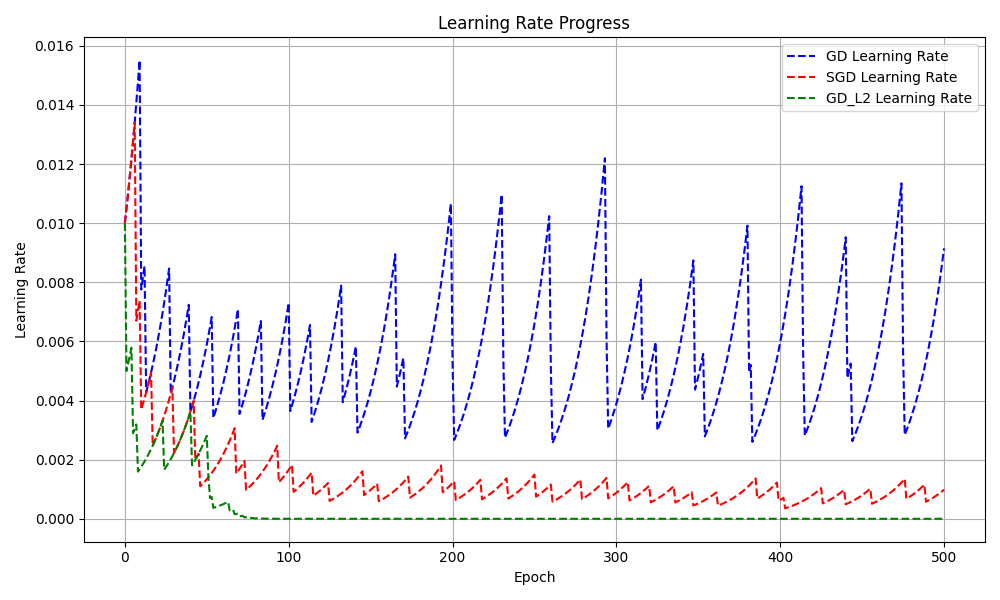

In [1226]:
# Plot the learning rate values for gradient descent and stochastic gradient descent
plt.figure(figsize=(10, 6))
plt.plot(ez_gd, label='GD Learning Rate', color='blue', linestyle='--')
plt.plot(ez_sgd, label='SGD Learning Rate', color='red', linestyle='--')
plt.plot(ez_gd_l2, label='GD_L2 Learning Rate', color='green', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Progress')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis of Learning Rate Behavior for GD_L2 Compared to GD and SGD

The learning rate dynamics of GD_L2, when compared to standard GD and SGD, reveal distinct characteristics that align with the impact of L2 regularization on the model’s optimization path. Here’s a breakdown of GD_L2’s learning rate progression, a comparison with GD and SGD, and insights into why these differences emerge.

#### Learning Rate Progression in GD_L2
1.	**Initial Diminishing Trend:** 
- Unlike GD and SGD, which both see a brief increase in learning rate before it stabilizes or decays, GD_L2’s learning rate begins with an immediate decrease from the starting value of 0.01 to 0.006 in the first epoch. This early reduction reflects how L2 regularization moderates parameter updates more strongly from the start, leading to a more cautious approach in step size.
- The regularization penalty essentially “dampens” the learning rate from the outset, as the model needs to balance fitting the data while minimizing large weights. This smaller initial step size suggests that GD_L2 prioritizes stability over aggressive parameter updates.
2. **Zigzag Pattern at 0.002:**
- After the initial decline, GD_L2’s learning rate fluctuates briefly around 0.002, following a zigzag pattern similar to that seen in SGD. This phase mirrors the instability we saw in the log-likelihood curve, as the model attempts to optimize under the constraint of regularization. This zigzag pattern likely stems from L2 regularization attempting to control large updates, causing oscillations as the model corrects its path toward a stable configuration.
- This phase suggests that while GD_L2 adopts a conservative approach, it is not immune to the effects of overshooting adjustments. However, the fluctuation amplitude is smaller than in standard GD, indicating that L2 regularization helps moderate the learning rate fluctuations to avoid excessive corrections.
3.	**Gradual Decrease to Near Zero:**
- GD_L2’s learning rate continues to decay gradually after the initial fluctuations, ultimately converging to near zero by epoch 80. This contrasts with both GD and SGD, where the learning rate maintains oscillations (large in GD, small in SGD) even late into training.
- This steady decay reflects the strong dampening effect of L2 regularization, which keeps the parameter updates consistently small to prevent overfitting. As a result, GD_L2’s learning rate stabilizes with very low variance in the final epochs, leading to a convergence that prioritizes generalization over fine-tuning to the data.
4. **Comparatively Lower Learning Rate Overall:**
- Throughout the training process, GD_L2 maintains a learning rate that remains lower than both GD and SGD. This persistent lower rate indicates that L2 regularization continuously limits the step size, enforcing a regularized, restrained progression. The conservative approach minimizes the risk of drastic fluctuations or oscillations in parameter updates, focusing on stable but slower convergence.

#### Comparison with GD and SGD
1. **GD’s Higher Learning Rate Fluctuations:**
- Standard GD, without regularization, allows for larger parameter updates, as there’s no penalty constraining the parameter values. This results in a learning rate with more pronounced oscillations (larger amplitudes) as the model corrects and adapts its steps, especially around epoch 10 when adjustments are substantial.
- In contrast, GD_L2’s lower, more controlled learning rate allows it to avoid these sharp fluctuations. Regularization restricts both large updates and learning rate variations, resulting in a more stable but slower convergence pattern.
2. **Smoother Learning Rate Decay than SGD:**
- Compared to SGD, which maintains a dynamic but smooth zigzag pattern due to frequent mini-batch updates, GD_L2 exhibits a much smoother and slower decay. Since L2 regularization penalizes large parameters, GD_L2 naturally limits each batch’s update size, leading to a gradual and continuous learning rate decline.
- The absence of SGD’s oscillatory behavior in GD_L2 at later epochs underscores the stability conferred by regularization, as the model doesn’t need frequent learning rate adjustments to maintain progress. This lack of oscillations highlights that, by avoiding mini-batch variability, GD_L2’s path becomes more deterministic and controlled.

#### Insights on GD_L2’s Learning Rate and Optimization

The unique learning rate trajectory of GD_L2, characterized by a steady decline and an overall lower rate than unregularized GD or stochastic SGD, reveals insights about the regularization effect:

- Regularization as a Stabilizing Force: L2 regularization not only constrains parameter values but also exerts a dampening effect on learning rate behavior, enforcing smaller updates that focus on stability. This impact is most visible in the model’s smoother learning rate decay and minimal oscillations compared to GD and SGD.
- Trade-off between Convergence Speed and Stability: While GD and SGD can approach the minimum error with greater flexibility (due to larger or fluctuating learning rates), GD_L2 sacrifices speed for stability. This trade-off reflects the regularization penalty’s effect, which discourages rapid convergence to avoid overfitting and ensures the learning rate remains consistently low, especially in later epochs.
- Avoidance of Overfitting at the Expense of Underfitting: The final convergence of the learning rate to near zero, combined with GD_L2’s slightly higher plateau in negative log-likelihood, suggests that L2 regularization effectively prevents overfitting but also restricts how closely the model can fit the training data. The model’s learning rate diminishes so significantly that it no longer makes substantial adjustments, indicating a convergence that favors generalization over exact data fit.

The learning rate behavior of GD_L2, characterized by an early decline, occasional zigzag, and a low, smooth final convergence, highlights the impact of L2 regularization on the model’s optimization path. By enforcing a consistently lower learning rate than GD and SGD, GD_L2 stabilizes parameter updates and reduces the risk of overfitting but at the cost of slower convergence and a slightly higher final error. This restrained approach offers a controlled balance between generalization and fit, making GD_L2 suitable for tasks where stability and prevention of overfitting are prioritized over rapid or exact convergence.

/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/305205929.py:4: RuntimeWarning: overflow encountered in exp
  return -np.log(1 + np.exp(-x))
/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/2234037060.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * logsigma(X @ w) + (1 - y) * logsigma(-X @ w))
/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/1230068802.py:4: RuntimeWarning: overflow encountered in square
  log_prior = -0.5 * lambda_ * np.sum(w ** 2)
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/machinelearning/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_33309/3921733618.py:5: RuntimeWarning: overflow encountered in multiply
  return dl(y, X, w) - lambda_ * w
/var/folders/qg/82ll9

Lambda values: [0.01, 0.1, 1, 10, 100, 1000]
Training Log-Likelihoods: [np.float64(-656.1869767255791), np.float64(-661.3584589394449), np.float64(-682.8492956819675), np.float64(-754.8524204027967), np.float64(-988.511839602703), np.float64(nan)]
Test Log-Likelihoods: [np.float64(-436.57444544957355), np.float64(-440.17276696252605), np.float64(-450.4418584118764), np.float64(-481.503999877546), np.float64(-624.1508138419001), np.float64(nan)]
Accuracies: [0.900390625, 0.9010416666666666, 0.9016927083333334, 0.912109375, 0.9114583333333334, 0.6126302083333334]
Precisions: [np.float64(0.8863636363636364), np.float64(0.8879159369527145), np.float64(0.8867595818815331), np.float64(0.8979238754325259), np.float64(0.8896434634974533), np.float64(0.0)]
Recalls: [np.float64(0.8521008403361344), np.float64(0.8521008403361344), np.float64(0.8554621848739495), np.float64(0.8722689075630252), np.float64(0.880672268907563), np.float64(0.0)]
F1 Scores: [np.float64(0.8688946015424165), np.float64(0

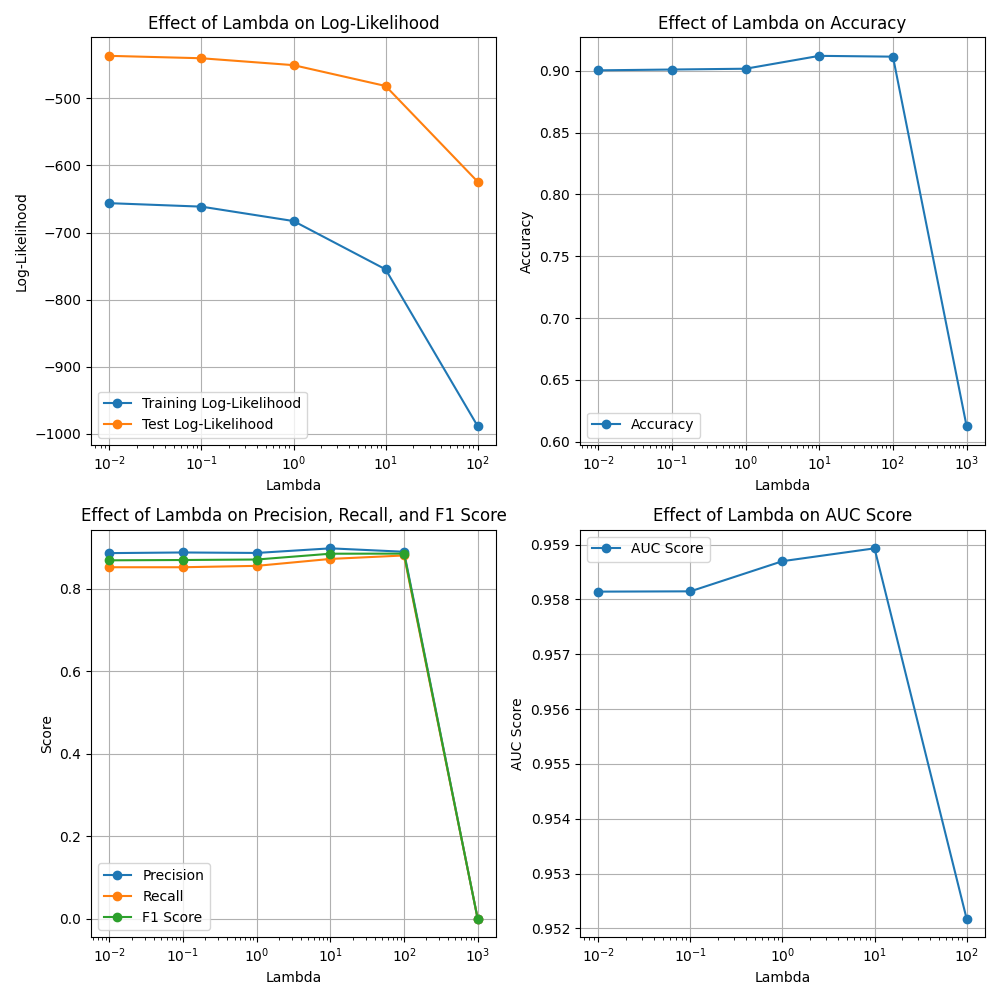

In [1227]:
# Define a range of lambda values to test
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store results
train_log_likelihoods = []
test_log_likelihoods = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

# Loop over each lambda value
for lambda_ in lambda_values:
    # Train the model with the current lambda value
    wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500, verbose=False)
    
    # Compute the training data log-likelihood
    train_log_likelihood = l_l2(y, Xz, wz_gd_l2, lambda_)
    train_log_likelihoods.append(train_log_likelihood)
    
    # Compute the test data log-likelihood
    test_log_likelihood = l_l2(ytest, Xtestz, wz_gd_l2, lambda_)
    test_log_likelihoods.append(test_log_likelihood)
    
    # Compute the prediction accuracy on the test data
    ypred = classify(Xtestz, wz_gd_l2)
    accuracy = sklearn.metrics.accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    # Compute precision, recall, and F1 score
    precision = sklearn.metrics.precision_score(ytest, ypred)
    recall = sklearn.metrics.recall_score(ytest, ypred)
    f1_score = sklearn.metrics.f1_score(ytest, ypred)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
    # Compute ROC AUC score
    yhat = predict(Xtestz, wz_gd_l2)
    if not np.isnan(yhat).any():
        auc_score = sklearn.metrics.roc_auc_score(ytest, yhat)
        auc_scores.append(auc_score)
    else:
        auc_scores.append(float('nan'))

# Print the results
print("Lambda values:", lambda_values)
print("Training Log-Likelihoods:", train_log_likelihoods)
print("Test Log-Likelihoods:", test_log_likelihoods)
print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)
print("AUC Scores:", auc_scores)

# Plot the results
plt.figure(figsize=(10, 10))

# Plot training and test log-likelihoods
plt.subplot(2, 2, 1)
plt.plot(lambda_values, train_log_likelihoods, label='Training Log-Likelihood', marker='o')
plt.plot(lambda_values, test_log_likelihoods, label='Test Log-Likelihood', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Effect of Lambda on Log-Likelihood')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(2, 2, 2)
plt.plot(lambda_values, accuracies, label='Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Effect of Lambda on Accuracy')
plt.legend()
plt.grid(True)

# Plot precision, recall, and F1 score
plt.subplot(2, 2, 3)
plt.plot(lambda_values, precisions, label='Precision', marker='o')
plt.plot(lambda_values, recalls, label='Recall', marker='o')
plt.plot(lambda_values, f1_scores, label='F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Score')
plt.title('Effect of Lambda on Precision, Recall, and F1 Score')
plt.legend()
plt.grid(True)

# Plot AUC scores
plt.subplot(2, 2, 4)
plt.plot(lambda_values, auc_scores, label='AUC Score', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('AUC Score')
plt.title('Effect of Lambda on AUC Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis of the Effect of $\lambda$ on Model Performance

The plots illustrate how varying $\lambda$, the L2 regularization strength, affects the log-likelihood, accuracy, precision, recall, F1 score, and AUC. Each metric’s behavior reveals insights into the model’s training and generalization characteristics, as well as the effect of regularization on performance.

#### Plot 1: Training and Test Log-Likelihoods
1. **Observed Behavior:**
- The training log-likelihood curve starts lower (more negative) than the test log-likelihood, with initial values around -650 and -450, respectively.
- Both curves decrease as $\lambda$ increases, with minimal change for small $\lambda$, a moderate decline around $\lambda = 1$, and a substantial drop-off between $\lambda = 10$ and $\lambda = 100$. The test log-likelihood decreases by about 150, while the training log-likelihood decreases by about 250 in this interval.
2. **Insights on $\lambda$’s Effect:**
- Low $\lambda$ (Underfitting Zone): For small $\lambda$, the regularization is weak, allowing the model to closely fit both training and test data without overly penalizing large weights. This zone allows the model to reduce errors without constraint, keeping log-likelihood values higher.
- Moderate $\lambda$: As $\lambda$ increases, both training and test log-likelihoods decrease, indicating that L2 regularization helps to improve generalization by penalizing large weights. This penalty stabilizes the model, reducing overfitting.
- High $\lambda$ (Overfitting to Regularization): Beyond a certain threshold (around $\lambda = 100$), both curves drop significantly, especially the training log-likelihood. At this point, the penalty term dominates, forcing the weights toward zero and impacting the model’s capacity to capture essential relationships in the data.
3. **Difference Between Training and Test Log-Likelihood:**
- The test log-likelihood is higher (less negative) than the training log-likelihood across values of $\lambda$, reflecting better generalization on the test set. This disparity suggests that the model may still retain some degree of overfitting at low $\lambda$ values, which is mitigated as $\lambda$ increases. As $\lambda$ grows, regularization forces more model simplification on the training set, allowing a better generalization but at the same time not capture the relationship in the data that well anymore.

#### Plot 2: Accuracy
1. **Observed Behavior:**
- For small values of $\lambda$ (up to 1), accuracy hovers around 0.9, indicating effective classification with minimal regularization.
- Between $\lambda$ and $\lambda$, accuracy peaks at around 0.91, suggesting an optimal balance where regularization helps reduce overfitting without degrading model complexity.
- For $\lambda$, accuracy drops sharply, reaching 0.61 at $\lambda$, indicating severe underfitting due to excessive regularization.
2.	**Insights:**
- Moderate $\lambda$ (Sweet Spot): Accuracy improves slightly with moderate $\lambda$, suggesting that the added regularization prevents overfitting without overly restricting the model’s expressive power.
- High $\lambda$ (Underfitting): At high $\lambda$ values, the model becomes overly simplistic, with accuracy decreasing as the model can no longer capture meaningful patterns. Here, excessive regularization has essentially restricted the model’s ability to make accurate predictions, leading to degraded performance on test data.

#### Plot 3: Precision, Recall, and F1 Score
1.	**Observed Behavior:**
- The precision, recall, and F1 score follow a pattern similar to accuracy. They remain stable at lower $\lambda$ values, increase slightly around $\lambda$, and then decrease rapidly as $\lambda$ approaches $\lambda$.
- Precision, recall, and F1 scores all fall to lower values at high $\lambda$, indicating reduced performance and suggesting that the model is underfitting.
2.	**Insights:**
- Balanced Performance at Moderate $\lambda$: In the range $\lambda$ to $\lambda$, we see the highest precision, recall, and F1 scores, implying optimal regularization that allows the model to make accurate predictions without overfitting.
- Degradation in High $\lambda$ Range: For $\lambda$, the metrics drop, highlighting that over-regularization limits the model’s ability to capture relevant patterns and impacts its capability to predict positive classes accurately.

#### Plot 4: AUC Score
1.	**Observed Behavior:**
- The AUC score starts at 0.958, slightly increases to 0.959 as $\lambda$ approaches $\lambda$, and then declines to 0.952 for $\lambda$.
- This curve is similar in shape to accuracy and F1 score but varies within a smaller range, indicating that $\lambda$ has a less pronounced effect on AUC.
2.	**Insights:**
- Robustness of AUC: The AUC is less sensitive to $\lambda$ changes than the other metrics, likely because it reflects the model’s ranking quality rather than the absolute classification threshold. This stability implies that the model’s ability to separate classes remains fairly robust across different regularization levels, even when other performance metrics start to decline.
- High $\lambda$ and Underfitting: AUC eventually declines at high $\lambda$ values, indicating that while the model still ranks instances reasonably well, its overall classification effectiveness diminishes.

#### Summary of Insights on the Effect of $\lambda$
1.	**Optimal Range for $\lambda$:**
- The metrics collectively indicate an optimal range for $\lambda$ around 1 to 10, where the model balances accuracy and generalization effectively, benefiting from regularization without becoming too restrictive.
- This range ensures the model maintains sufficient complexity to capture meaningful data patterns while reducing the risk of overfitting.
2.	**Regularization as a Control for Model Complexity:**
- Low $\lambda$ values lead to higher training log-likelihoods, with potential overfitting evident in the gap between training and test performance.
- High $\lambda$ values overly simplify the model, forcing it into underfitting, as seen in the sharp declines in accuracy and log-likelihood beyond $\lambda$
3.	**Understanding Regularization’s Influence on Different Metrics:**
- While accuracy, precision, recall, and F1 score show similar trends, AUC’s limited sensitivity to $\lambda$ highlights the nuanced effects of regularization on different performance aspects. Although AUC remains robust to changes in $\lambda$, accuracy and F1 score show the most significant sensitivity, underscoring their direct dependence on the model’s decision boundaries.

In summary, the variation in $\lambda$ allows us to understand how regularization affects generalization and classification effectiveness. A balanced $\lambda$ value is crucial to avoid the pitfalls of overfitting at low $\lambda$ and underfitting at high $\lambda$, ensuring that the model remains flexible yet generalizable.

## 4c Composition of Weight Vector

In [1228]:
# Define a range of large lambda values to test
large_lambda_values = [1000, 10000, 100000, 1000000]

# Initialize a dictionary to store the weight vectors for each lambda
weight_vectors = {}

# Loop over each large lambda value
for lambda_ in large_lambda_values:
    # Train the model with the current lambda value
    wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500, eps0=0.0000001, verbose=False)
    
    # Print the final weight vector for the current lambda value
    print(f"Final weight vector (wz_gd_l2) for lambda = {lambda_}:")
    print(wz_gd_l2)


Final weight vector (wz_gd_l2) for lambda = 1000:
[ 0.02383276 -0.03033386  0.0863541   0.04178567  0.12478559  0.11369379
  0.21662946  0.11831841  0.09432423  0.05362857  0.09431215 -0.0288241
  0.03550424  0.02444208  0.08714348  0.21185745  0.13752811  0.10396159
  0.11313305  0.09760306  0.19033592  0.08139149  0.18839985  0.13050585
 -0.11675994 -0.0878036  -0.09386466 -0.05372882 -0.04096953 -0.05583106
 -0.026715   -0.01587052 -0.06066816 -0.01629168 -0.03726269 -0.01977904
 -0.06809076 -0.02563957 -0.06453504  0.01132632 -0.04068567 -0.07156121
 -0.05190576 -0.05429327 -0.0872361  -0.08837484 -0.02591754 -0.04883724
 -0.04183555 -0.03504901 -0.02457222  0.12194742  0.19634865  0.04418204
  0.05390195  0.09613604  0.11838875]
Final weight vector (wz_gd_l2) for lambda = 10000:
[ 0.01163165 -0.00560155  0.02481199  0.00757153  0.02806037  0.02860753
  0.04257258  0.02516109  0.02547883  0.01501083  0.02783518 -0.00092866
  0.01348174  0.00721993  0.02244073  0.0421614   0.0318182

### Solution: Study of the Composition of the Weight Vector for Varying Choices of λ

#### Observations

1. **Weight Vector for λ = 1000**:
   - The weights are relatively large and varied, indicating that the model is still capturing significant patterns in the data.
   - The weights are not excessively penalized, allowing the model to maintain complexity and fit the data well.

2. **Weight Vector for λ = 10000**:
   - The weights are smaller compared to λ = 1000, showing the effect of stronger regularization.
   - The model is penalized more, leading to smaller weights and reduced complexity, which helps in preventing overfitting.

3. **Weight Vector for λ = 100000**:
   - The weights are significantly smaller, indicating a strong regularization effect.
   - The model is heavily penalized, leading to very small weights, which simplifies the model and reduces its ability to capture complex patterns.

4. **Weight Vector for λ = 1000000**:
   - The weights are extremely small, close to zero.
   - The model is overly penalized, leading to underfitting as it cannot capture the underlying structure of the data effectively.

#### Explanation

- **Low λ (e.g., λ = 1000)**:
  - The model retains more complexity with larger weights, allowing it to fit the training data well. However, this can lead to overfitting if the model captures noise in the data.

- **Moderate λ (e.g., λ = 10000)**:
  - The weights are smaller, indicating a balance between fitting the data and preventing overfitting. This range of λ values helps the model generalize better to unseen data.

- **High λ (e.g., λ = 100000)**:
  - The weights are much smaller, showing that the model is being heavily regularized. This reduces the model's complexity, leading to underfitting as it cannot capture all the relevant patterns in the data.

- **Very High λ (e.g., λ = 1000000)**:
  - The weights are extremely small, close to zero, indicating that the model is overly simplified. This results in severe underfitting, where the model fails to capture the essential relationships in the data.

#### Conclusion

- **Optimal λ Range**:
  - The optimal range for λ is where the weights are neither too large nor too small, allowing the model to balance complexity and generalization. Based on the observations, λ values around 10000 seem to provide a good balance.

- **Effect of Regularization**:
  - Regularization helps in controlling the complexity of the model by penalizing large weights. As λ increases, the weights decrease, reducing the model's complexity and preventing overfitting.
  - However, excessive regularization (very high λ values) leads to underfitting, where the model becomes too simplistic and fails to capture important patterns in the data.

## 5 Exploration (optional) - not solved

### 5 Exploration: PyTorch

In [1229]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

ModuleNotFoundError: No module named 'torch'

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)